In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd
import seaborn as sns  # visualization tool
import json #for parse "properties" parameter
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Please note, I am working on Google Colab and the file address would differ from system to system
data_doc_reports=pd.read_csv("/content/drive/MyDrive/Revolut Home Task/Revolut Ops Challenge/doc_reports.csv")
data_facial_similarity_reports=pd.read_csv("/content/drive/MyDrive/Revolut Home Task/Revolut Ops Challenge/facial_similarity_reports.csv")
data_doc_reports['created_at']=pd.to_datetime(data_doc_reports['created_at'])
data_facial_similarity_reports['created_at']=pd.to_datetime(data_facial_similarity_reports['created_at'])

In [4]:
final_data=data_doc_reports.merge(data_facial_similarity_reports,on=data_doc_reports.index)

In [5]:
final_data.drop(['key_0'],1,inplace=True)
dup_cols=[]
for i in final_data.columns:
  if "_y" in i or "_x" in i:
    org_name=i[:-2]
    dup_cols+=[org_name]
    
new_dup_list=[]
for item in dup_cols:
  if item in new_dup_list:
    continue
  else:
    new_dup_list+=[item]

dup_cols=new_dup_list
def is_equal_col(colA,colB,dataset):
  if dataset[colA].equals(dataset[colB]):
    return True
  return False

for i in dup_cols:
  if is_equal_col(i+'_y',i+'_x',final_data):
    final_data[i]=final_data[i+'_x']
    final_data.drop([i+'_x'],axis=1,inplace=True)
    final_data.drop([i+'_y'],axis=1,inplace=True)
    
final_data

,result_x,image_integrity_result,face_detection_result,image_quality_result,created_at_x,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id_x,police_record_result,compromised_document_result,properties_x,sub_result,result_y,face_comparison_result,created_at_y,facial_image_integrity_result,properties_y,attempt_id_y,Unnamed: 0,user_id,visual_authenticity_result
0,consider,clear,clear,clear,2017-06-20 23:12:57+00:00,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution,clear,clear,2017-06-20 23:12:58+00:00,clear,{},050a0596de424fab83c433eaa18b3f8d,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider
1,clear,clear,clear,clear,2017-06-20 23:16:04+00:00,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,clear,clear,2017-06-20 23:16:04+00:00,clear,{},f69c1e5f45a64e50a26740b9bfb978b7,1,15a84e8951254011b47412fa4e8f65b8,clear
2,clear,clear,clear,clear,2017-06-20 17:59:49+00:00,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,clear,clear,2017-06-20 17:59:49+00:00,clear,{},f9f84f3055714d8e8f7419dc984d1769,2,ffb82fda52b041e4b9af9cb4ef298c85,clear
3,clear,clear,clear,clear,2017-06-20 17:59:38+00:00,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,clear,clear,2017-06-20 17:59:39+00:00,clear,{},10a54a1ecf794404be959e030f11fef6,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear
4,clear,clear,clear,clear,2017-06-20 18:08:09+00:00,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,clear,clear,2017-06-20 18:08:09+00:00,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176399,clear,clear,clear,clear,2017-06-20 22:25:53+00:00,clear,NaN,NaN,clear,clear,NaN,72a2cccc9e9942deb5274a16536bf2d0,clear,NaN,"{'gender': 'Female', 'nationality': 'CHN', 'do...",clear,clear,clear,2017-06-20 22:25:53+00:00,clear,{},72a2cccc9e9942deb5274a16536bf2d0,181987,c7f99ee763bf45d289019c6ac2cbd919,clear
176400,clear,clear,clear,clear,2017-06-20 22:27:40+00:00,clear,NaN,NaN,clear,NaN,NaN,8c83017191204a3887c2d47ca2d998ce,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,clear,clear,2017-06-20 22:27:40+00:00,clear,{},8c83017191204a3887c2d47ca2d998ce,181988,8b47d72c363e4591861f523dd7487f20,clear
176401,clear,clear,clear,clear,2017-06-20 22:25:59+00:00,clear,NaN,NaN,clear,clear,NaN,bfea35bcb6a940118ca5816cd8ffcae7,clear,NaN,"{'gender': 'Female', 'nationality': 'GBR', 'do...",clear,clear,clear,2017-06-20 22:25:59+00:00,clear,{},bfea35bcb6a940118ca5816cd8ffcae7,181989,3d16e02c245a4f1a8a76662ad933d5c4,clear
176402,clear,clear,clear,clear,2017-06-20 22:35:40+00:00,clear,NaN,NaN,clear,clear,NaN,9190cf28b35b425083bdb41e121822fe,clear,NaN,"{'gender': 'Male', 'nationality': 'PRT', 'docu...",clear,clear,clear,2017-06-20 22:35:41+00:00,clear,{},9190cf28b35b425083bdb41e121822fe,181990,65c49a09d299486091b6586487679b87,clear


In [6]:
for i in final_data.columns:
  if '_x' in i:
    new_name=i[:-2]+'_docs'
    final_data[new_name]=final_data[i]
    final_data.drop([i],axis=1,inplace=True)
  elif '_y' in i:
    new_name=i[:-2]+'_facial'
    final_data[new_name]=final_data[i]
    final_data.drop([i],axis=1,inplace=True)

In [7]:
final_data['Passed']=(final_data['result_docs']=="clear") & (final_data['result_facial']=="clear")

final_data

,image_integrity_result,face_detection_result,image_quality_result,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,police_record_result,compromised_document_result,sub_result,face_comparison_result,facial_image_integrity_result,Unnamed: 0,user_id,visual_authenticity_result,result_docs,created_at_docs,attempt_id_docs,properties_docs,result_facial,created_at_facial,properties_facial,attempt_id_facial,Passed
0,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,caution,clear,clear,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,2017-06-20 23:12:57+00:00,050a0596de424fab83c433eaa18b3f8d,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",clear,2017-06-20 23:12:58+00:00,{},050a0596de424fab83c433eaa18b3f8d,False
1,clear,clear,clear,clear,NaN,NaN,clear,NaN,NaN,clear,NaN,clear,clear,clear,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20 23:16:04+00:00,f69c1e5f45a64e50a26740b9bfb978b7,"{'gender': 'Female', 'document_type': 'driving...",clear,2017-06-20 23:16:04+00:00,{},f69c1e5f45a64e50a26740b9bfb978b7,True
2,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20 17:59:49+00:00,f9f84f3055714d8e8f7419dc984d1769,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,2017-06-20 17:59:49+00:00,{},f9f84f3055714d8e8f7419dc984d1769,True
3,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20 17:59:38+00:00,10a54a1ecf794404be959e030f11fef6,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,2017-06-20 17:59:39+00:00,{},10a54a1ecf794404be959e030f11fef6,True
4,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20 18:08:09+00:00,1f320d1d07de493292b7e0d5ebfb1cb9,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,2017-06-20 18:08:09+00:00,{},1f320d1d07de493292b7e0d5ebfb1cb9,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176399,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,181987,c7f99ee763bf45d289019c6ac2cbd919,clear,clear,2017-06-20 22:25:53+00:00,72a2cccc9e9942deb5274a16536bf2d0,"{'gender': 'Female', 'nationality': 'CHN', 'do...",clear,2017-06-20 22:25:53+00:00,{},72a2cccc9e9942deb5274a16536bf2d0,True
176400,clear,clear,clear,clear,NaN,NaN,clear,NaN,NaN,clear,NaN,clear,clear,clear,181988,8b47d72c363e4591861f523dd7487f20,clear,clear,2017-06-20 22:27:40+00:00,8c83017191204a3887c2d47ca2d998ce,"{'gender': 'Female', 'document_type': 'driving...",clear,2017-06-20 22:27:40+00:00,{},8c83017191204a3887c2d47ca2d998ce,True
176401,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,181989,3d16e02c245a4f1a8a76662ad933d5c4,clear,clear,2017-06-20 22:25:59+00:00,bfea35bcb6a940118ca5816cd8ffcae7,"{'gender': 'Female', 'nationality': 'GBR', 'do...",clear,2017-06-20 22:25:59+00:00,{},bfea35bcb6a940118ca5816cd8ffcae7,True
176402,clear,clear,clear,clear,NaN,NaN,clear,clear,NaN,clear,NaN,clear,clear,clear,181990,65c49a09d299486091b6586487679b87,clear,clear,2017-06-20 22:35:40+00:00,9190cf28b35b425083bdb41e121822fe,"{'gender': 'Male', 'nationality': 'PRT', 'docu...",clear,2017-06-20 22:35:41+00:00,{},9190cf28b35b425083bdb41e121822fe,True


In [8]:
map_encode_all = ['result_docs',                    
                  "image_integrity_result", 
                  "face_detection_result", 
                  "image_quality_result",
                  "supported_document_result",
                  'conclusive_document_quality_result',
                  'colour_picture_result', 
                  'data_validation_result',
                  'data_consistency_result', 
                  'data_comparison_result',
                  'police_record_result', 
                  'compromised_document_result',
                  'face_comparison_result', 
                  'facial_image_integrity_result',
                  'visual_authenticity_result',
                  'result_facial',
                  'Passed']

result_map = {"consider" : 1, "clear": 0, 'unidentified': 1,True:0,False:1}
def result_encode(features, dataset):
    for feature in features:
        dataset[feature] = dataset[feature].map(result_map)

        

    


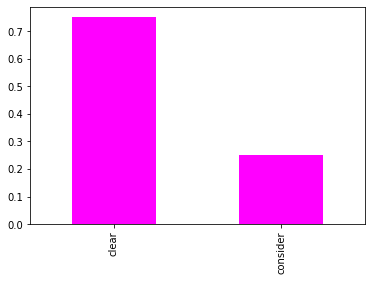

In [9]:
barplot=final_data.result_docs.value_counts(normalize=True).plot.bar(color='fuchsia')


In [10]:
result_encode(map_encode_all, final_data)
final_data.fillna(0, inplace=True)

In [11]:
final_data.head()

,image_integrity_result,face_detection_result,image_quality_result,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,police_record_result,compromised_document_result,sub_result,face_comparison_result,facial_image_integrity_result,Unnamed: 0,user_id,visual_authenticity_result,result_docs,created_at_docs,attempt_id_docs,properties_docs,result_facial,created_at_facial,properties_facial,attempt_id_facial,Passed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,caution,0.0,0.0,0,ab23fae164e34af0a1ad1423ce9fd9f0,1.0,1,2017-06-20 23:12:57+00:00,050a0596de424fab83c433eaa18b3f8d,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",0.0,2017-06-20 23:12:58+00:00,{},050a0596de424fab83c433eaa18b3f8d,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,clear,0.0,0.0,1,15a84e8951254011b47412fa4e8f65b8,0.0,0,2017-06-20 23:16:04+00:00,f69c1e5f45a64e50a26740b9bfb978b7,"{'gender': 'Female', 'document_type': 'driving...",0.0,2017-06-20 23:16:04+00:00,{},f69c1e5f45a64e50a26740b9bfb978b7,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,clear,0.0,0.0,2,ffb82fda52b041e4b9af9cb4ef298c85,0.0,0,2017-06-20 17:59:49+00:00,f9f84f3055714d8e8f7419dc984d1769,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",0.0,2017-06-20 17:59:49+00:00,{},f9f84f3055714d8e8f7419dc984d1769,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,clear,0.0,0.0,3,bd4a8b3e3601427e88aa1d9eab9f4290,0.0,0,2017-06-20 17:59:38+00:00,10a54a1ecf794404be959e030f11fef6,"{'gender': 'Male', 'issuing_date': '2007-08', ...",0.0,2017-06-20 17:59:39+00:00,{},10a54a1ecf794404be959e030f11fef6,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,clear,0.0,0.0,4,f52ad1c7e69543a9940c3e7f8ed28a39,0.0,0,2017-06-20 18:08:09+00:00,1f320d1d07de493292b7e0d5ebfb1cb9,"{'gender': 'Male', 'nationality': 'POL', 'docu...",0.0,2017-06-20 18:08:09+00:00,{},1f320d1d07de493292b7e0d5ebfb1cb9,0


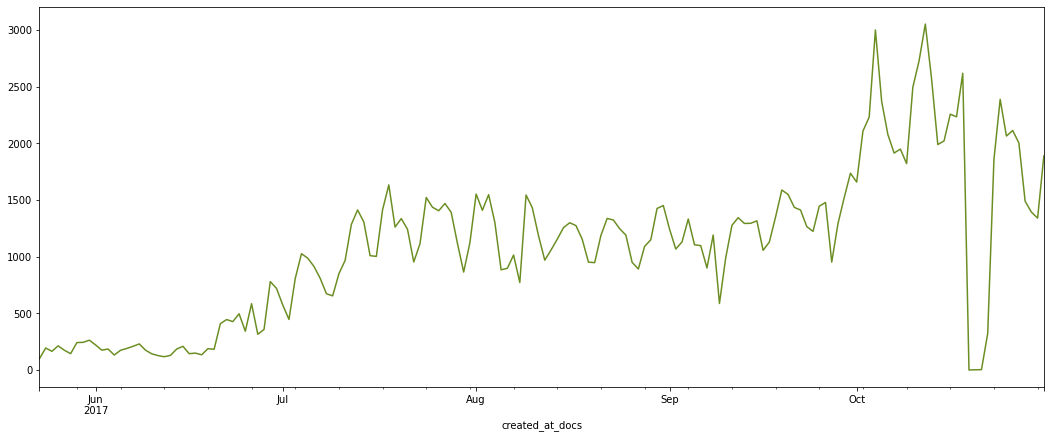

In [12]:
plt.rcParams['figure.figsize'] = (18, 7)
final_data.groupby(pd.Grouper(key='created_at_docs', freq='D'))['user_id'].count().plot(color='olivedrab');

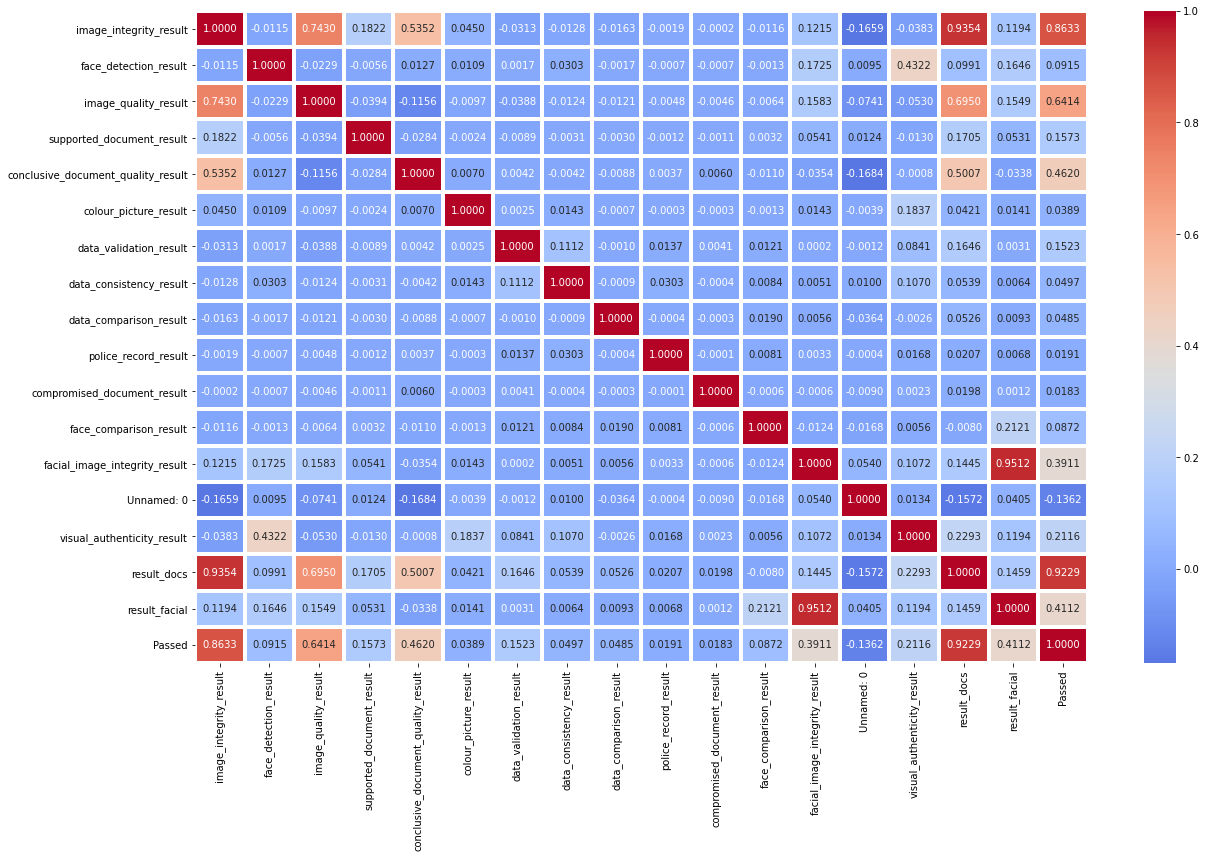

In [13]:
data_corr  = final_data.corr()
f,ax = plt.subplots(figsize =(20,12))
sns.heatmap(data_corr, annot = True, linewidths = 3,cmap="coolwarm", fmt = '.4f', ax = ax,center=0.35)
plt.show()

In [14]:
data_corr

,image_integrity_result,face_detection_result,image_quality_result,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,police_record_result,compromised_document_result,face_comparison_result,facial_image_integrity_result,Unnamed: 0,visual_authenticity_result,result_docs,result_facial,Passed
image_integrity_result,1.000000,-0.011513,0.743003,0.182214,0.535208,0.045038,-0.031292,-0.012813,-0.016350,-0.001861,-0.000216,-0.011642,0.121485,-0.165859,-0.038290,0.935447,0.119413,0.863292
face_detection_result,-0.011513,1.000000,-0.022893,-0.005614,0.012651,0.010915,0.001729,0.030306,-0.001732,-0.000680,-0.000652,-0.001280,0.172549,0.009496,0.432195,0.099111,0.164617,0.091466
image_quality_result,0.743003,-0.022893,1.000000,-0.039372,-0.115646,-0.009732,-0.038803,-0.012445,-0.012148,-0.004770,-0.004575,-0.006412,0.158336,-0.074090,-0.052970,0.695039,0.154878,0.641428
supported_document_result,0.182214,-0.005614,-0.039372,1.000000,-0.028361,-0.002387,-0.008909,-0.003052,-0.002979,-0.001170,-0.001122,0.003226,0.054056,0.012363,-0.012990,0.170452,0.053086,0.157304
conclusive_document_quality_result,0.535208,0.012651,-0.115646,-0.028361,1.000000,0.007015,0.004206,-0.004164,-0.008751,0.003713,0.006022,-0.011023,-0.035357,-0.168426,-0.000819,0.500659,-0.033776,0.462041
colour_picture_result,0.045038,0.010915,-0.009732,-0.002387,0.007015,1.000000,0.002516,0.014299,-0.000736,-0.000289,-0.000277,-0.001323,0.014324,-0.003931,0.183722,0.042131,0.014116,0.038881
data_validation_result,-0.031292,0.001729,-0.038803,-0.008909,0.004206,0.002516,1.000000,0.111247,-0.000985,0.013738,0.004069,0.012129,0.000173,-0.001169,0.084061,0.164572,0.003082,0.152267
data_consistency_result,-0.012813,0.030306,-0.012445,-0.003052,-0.004164,0.014299,0.111247,1.000000,-0.000942,0.030326,-0.000355,0.008399,0.005090,0.010042,0.106978,0.053875,0.006429,0.049720
data_comparison_result,-0.016350,-0.001732,-0.012148,-0.002979,-0.008751,-0.000736,-0.000985,-0.000942,1.000000,-0.000361,-0.000346,0.019021,0.005580,-0.036443,-0.002568,0.052591,0.009301,0.048535
police_record_result,-0.001861,-0.000680,-0.004770,-0.001170,0.003713,-0.000289,0.013738,0.030326,-0.000361,1.000000,-0.000136,0.008119,0.003288,-0.000375,0.016752,0.020652,0.006824,0.019059


Text(0.5, 1.0, 'Failure Rate Distribution of individual results')

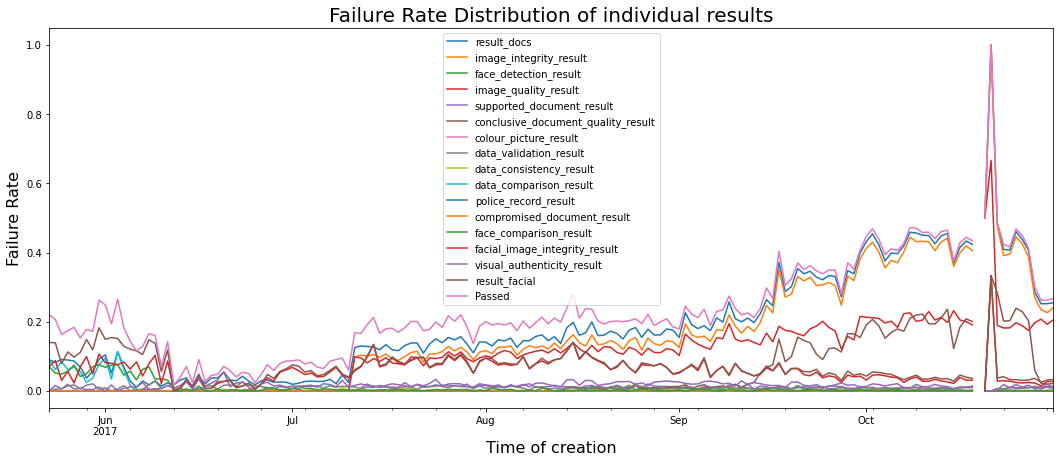

In [15]:

final_data.groupby(pd.Grouper(key='created_at_docs', freq='D'))[map_encode_all].mean().plot(kind="line");
plt.xlabel("Time of creation",fontsize=16)
plt.ylabel("Failure Rate",fontsize=16)
plt.title ("Failure Rate Distribution of individual results",fontsize=20)


Text(0, 0.5, 'Failure Rate')

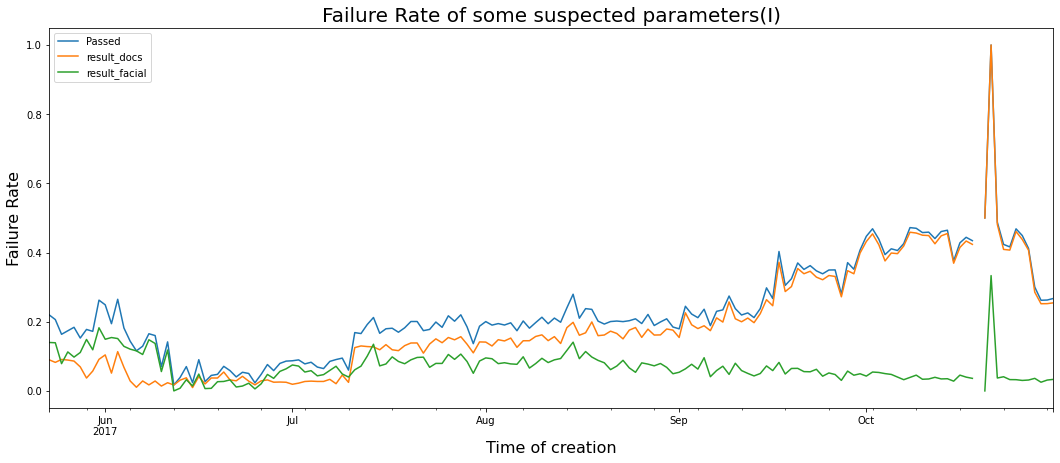

In [16]:
suspected_params_og= ["Passed", 'result_docs', 'result_facial']

final_data.groupby(pd.Grouper(key='created_at_docs', freq='D'))[suspected_params_og].mean().plot()
plt.title("Failure Rate of some suspected parameters(I)",fontsize=20)
plt.xlabel("Time of creation",fontsize=16)
plt.ylabel("Failure Rate",fontsize=16)


Text(0, 0.5, 'Failure Rate')

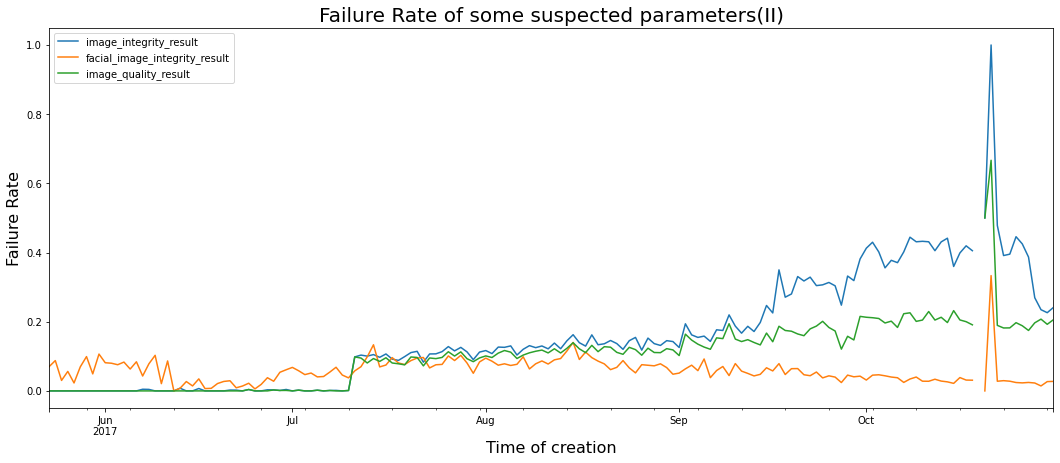

In [17]:
suspected_params = ["image_integrity_result", 'facial_image_integrity_result', 'image_quality_result']

final_data.groupby(pd.Grouper(key='created_at_docs', freq='D'))[suspected_params].mean().plot()
plt.title("Failure Rate of some suspected parameters(II)",fontsize=20)
plt.xlabel("Time of creation",fontsize=16)
plt.ylabel("Failure Rate",fontsize=16)
#All Accepted


Text(0, 0.5, 'Failure Rate')

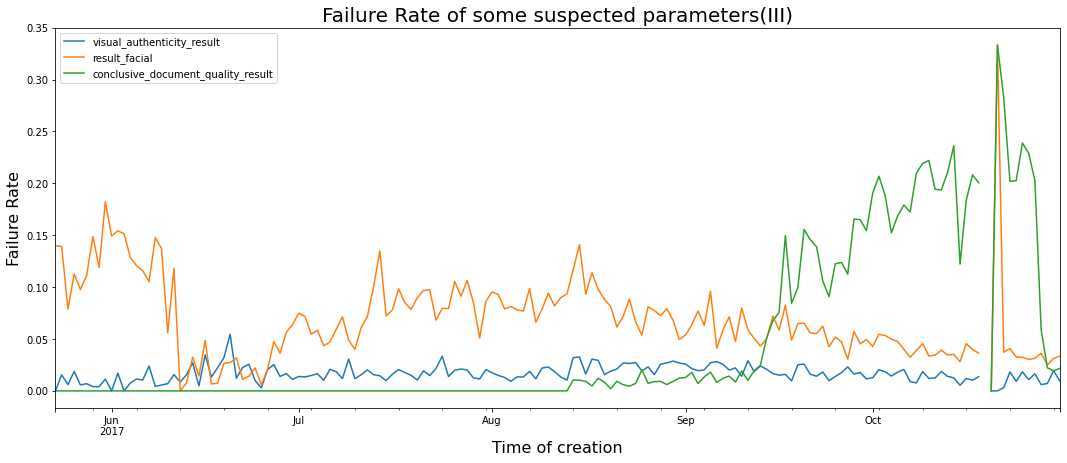

In [18]:
suspected_params_2 = ["visual_authenticity_result","result_facial","conclusive_document_quality_result"]
final_data.groupby(pd.Grouper(key='created_at_docs', freq='D'))[suspected_params_2].mean().plot()
plt.title("Failure Rate of some suspected parameters(III)",fontsize=20)
plt.xlabel("Time of creation",fontsize=16)
plt.ylabel("Failure Rate",fontsize=16)
#Conclusive_document and result_facial are accepted

Text(0, 0.5, 'Failure Rate')

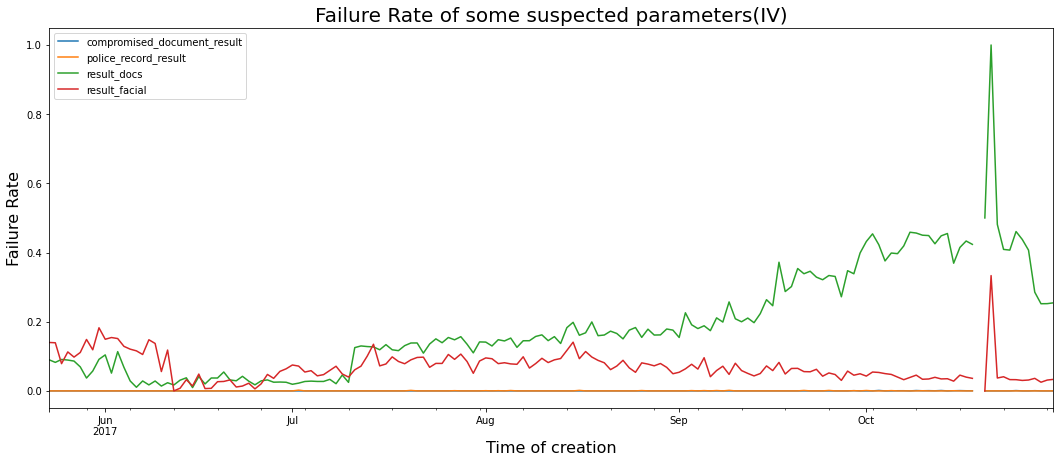

In [63]:
suspected_params_3=["compromised_document_result","police_record_result","result_docs","result_facial"]
final_data.groupby(pd.Grouper(key='created_at_docs', freq='D'))[suspected_params_3].mean().plot();
plt.title("Failure Rate of some suspected parameters(IV)",fontsize=20)
plt.xlabel("Time of creation",fontsize=16)
plt.ylabel("Failure Rate",fontsize=16)
#result_facial also peaks at this time.

In [20]:
final_data.properties_docs = final_data.properties_docs.apply(lambda row: row.replace('None', "\"NaN\""))
final_data['properties_docs'] = final_data.properties_docs.apply(lambda x: x.strip("\'<>()").replace('\'', '\"'))
final_data['properties_docs'] = final_data['properties_docs'].apply(json.loads)

final_data_1= final_data.drop('properties_docs', 1).assign(**pd.DataFrame(final_data.properties_docs.values.tolist()))
final_data_1.date_of_expiry = pd.to_datetime(final_data_1.date_of_expiry, errors='coerce', format='%Y-%m-%d')
final_data_1.issuing_date = pd.to_datetime(final_data_1.issuing_date, errors='coerce', format='%Y-%m')
final_data_1 = final_data_1.set_index(keys='created_at_docs')
final_data_1

,image_integrity_result,face_detection_result,image_quality_result,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,police_record_result,compromised_document_result,sub_result,face_comparison_result,facial_image_integrity_result,Unnamed: 0,user_id,visual_authenticity_result,result_docs,attempt_id_docs,result_facial,created_at_facial,properties_facial,attempt_id_facial,Passed,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version
created_at_docs,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-06-20 23:12:57+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,caution,0.0,0.0,0,ab23fae164e34af0a1ad1423ce9fd9f0,1.0,1,050a0596de424fab83c433eaa18b3f8d,0.0,2017-06-20 23:12:58+00:00,{},050a0596de424fab83c433eaa18b3f8d,1,Male,IRL,passport,2019-08-12,IRL,NaT,NaN,NaN
2017-06-20 23:16:04+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,clear,0.0,0.0,1,15a84e8951254011b47412fa4e8f65b8,0.0,0,f69c1e5f45a64e50a26740b9bfb978b7,0.0,2017-06-20 23:16:04+00:00,{},f69c1e5f45a64e50a26740b9bfb978b7,0,Female,NaN,driving_licence,2023-02-28,GBR,NaT,NaN,NaN
2017-06-20 17:59:49+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,clear,0.0,0.0,2,ffb82fda52b041e4b9af9cb4ef298c85,0.0,0,f9f84f3055714d8e8f7419dc984d1769,0.0,2017-06-20 17:59:49+00:00,{},f9f84f3055714d8e8f7419dc984d1769,0,Male,ITA,passport,2018-06-09,ITA,NaT,NaN,NaN
2017-06-20 17:59:38+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,clear,0.0,0.0,3,bd4a8b3e3601427e88aa1d9eab9f4290,0.0,0,10a54a1ecf794404be959e030f11fef6,0.0,2017-06-20 17:59:39+00:00,{},10a54a1ecf794404be959e030f11fef6,0,Male,NaN,national_identity_card,NaT,FRA,2007-08-01,NaN,NaN
2017-06-20 18:08:09+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,clear,0.0,0.0,4,f52ad1c7e69543a9940c3e7f8ed28a39,0.0,0,1f320d1d07de493292b7e0d5ebfb1cb9,0.0,2017-06-20 18:08:09+00:00,{},1f320d1d07de493292b7e0d5ebfb1cb9,0,Male,POL,national_identity_card,2019-05-29,POL,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20 22:25:53+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,clear,0.0,0.0,181987,c7f99ee763bf45d289019c6ac2cbd919,0.0,0,72a2cccc9e9942deb5274a16536bf2d0,0.0,2017-06-20 22:25:53+00:00,{},72a2cccc9e9942deb5274a16536bf2d0,0,Female,CHN,passport,2027-04-23,CHN,NaT,NaN,NaN
2017-06-20 22:27:40+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,clear,0.0,0.0,181988,8b47d72c363e4591861f523dd7487f20,0.0,0,8c83017191204a3887c2d47ca2d998ce,0.0,2017-06-20 22:27:40+00:00,{},8c83017191204a3887c2d47ca2d998ce,0,Female,NaN,driving_licence,2026-04-20,GBR,NaT,NaN,NaN
2017-06-20 22:25:59+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,clear,0.0,0.0,181989,3d16e02c245a4f1a8a76662ad933d5c4,0.0,0,bfea35bcb6a940118ca5816cd8ffcae7,0.0,2017-06-20 22:25:59+00:00,{},bfea35bcb6a940118ca5816cd8ffcae7,0,Female,GBR,passport,2023-07-11,GBR,NaT,NaN,NaN


## Image Integrity Failures


In [21]:

'''
final_data_1[(final_data_1['Passed'] == 1) & (final_data_1['image_integrity_result'] == 1)]['issuing_country'].value_counts().plot(kind='bar',color='lime')
plt.title("Image Integrity Failure distribution as per issuing country")
plt.xlabel("Issuing country")
plt.ylabel("Number of failures")
'''

'\nfinal_data_1[(final_data_1[\'Passed\'] == 1) & (final_data_1[\'image_integrity_result\'] == 1)][\'issuing_country\'].value_counts().plot(kind=\'bar\',color=\'lime\')\nplt.title("Image Integrity Failure distribution as per issuing country")\nplt.xlabel("Issuing country")\nplt.ylabel("Number of failures")\n'

In [22]:
'''
final_data_1[(final_data_1['Passed'] == 1) & (final_data_1['image_integrity_result'] == 1)]['nationality'].value_counts().plot(kind='bar',color='tomato')
plt.title("Image Integrity Failure distribution as per nationality")
plt.xlabel("Nationality")
plt.ylabel("Number of failures")
'''

'\nfinal_data_1[(final_data_1[\'Passed\'] == 1) & (final_data_1[\'image_integrity_result\'] == 1)][\'nationality\'].value_counts().plot(kind=\'bar\',color=\'tomato\')\nplt.title("Image Integrity Failure distribution as per nationality")\nplt.xlabel("Nationality")\nplt.ylabel("Number of failures")\n'

In [23]:
#final_data_1 = final_data_1.set_index(keys='created_at_docs')
'''
final_data_1[(final_data_1['Passed'] == 1) & (final_data_1['image_integrity_result'] == 1)]['document_type'].value_counts().plot(kind='bar',figsize=(6,6),color='darkgoldenrod')
plt.title("Image Integrity Failure distribution as per document type")
plt.xlabel("Document Type")
plt.ylabel("Number of failures")
'''

'\nfinal_data_1[(final_data_1[\'Passed\'] == 1) & (final_data_1[\'image_integrity_result\'] == 1)][\'document_type\'].value_counts().plot(kind=\'bar\',figsize=(6,6),color=\'darkgoldenrod\')\nplt.title("Image Integrity Failure distribution as per document type")\nplt.xlabel("Document Type")\nplt.ylabel("Number of failures")\n'

Failed Applicants
 GBR    24.0
FRA    13.0
IRL    13.0
POL     6.0
ITA     5.0
       ... 
<B0     0.0
DN<     0.0
PSE     0.0
SDN     0.0
ARE     0.0
Name: nationality, Length: 182, dtype: float64 

Total Applicants
 GBR    7066
ESP    4355
FRA    3622
POL    2845
IRL    2808
       ... 
<B0       1
DN<       1
PSE       1
SDN       1
ARE       1
Name: nationality, Length: 182, dtype: int64 

Percentages
      Percentages
GBR     0.339655
ESP     0.091848
FRA     0.358918
POL     0.210896
IRL     0.462963
LTU     0.078217
PRT     0.178015
DEU     0.072886
CHE     0.100100
ITA     0.504541
ROU     0.128700
NLD     0.313972
BEL     0.317965
GRC     0.000000
HUN     0.725953


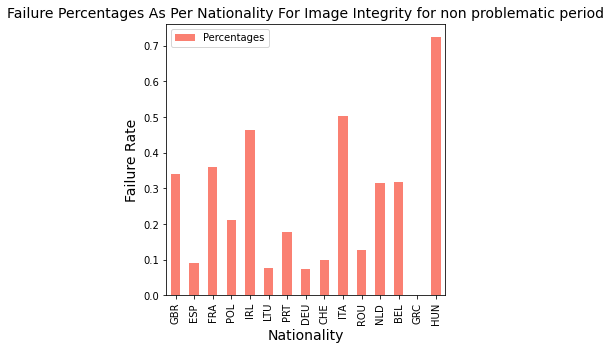

In [64]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['image_integrity_result'] == 1)]['nationality'].value_counts()
b=final_data_2['nationality'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='salmon',figsize=(5,5))
plt.xlabel("Nationality",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Nationality For Image Integrity for non problematic period",fontsize=14)
plt.show()

Failed Applicants
 driving_licence           125
passport                   87
national_identity_card     39
residence_permit            4
Name: document_type, dtype: int64 

Total Applicants
 driving_licence           25585
passport                  21940
national_identity_card    25813
residence_permit           1451
dtype: int64 

Percentages
 driving_licence           0.488568
passport                  0.396536
national_identity_card    0.151087
residence_permit          0.275672
dtype: float64


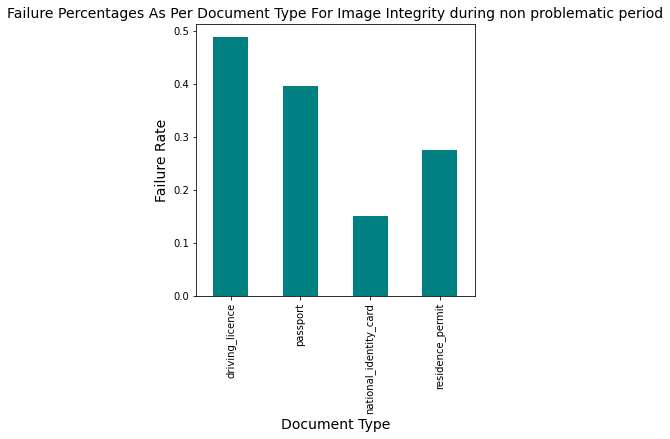

In [67]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['image_integrity_result'] == 1)]['document_type'].value_counts()
b=final_data_2['document_type'].value_counts()
dictionary={}
for item in a.index:
  dictionary[item]=b[item]
b=pd.Series(dictionary)
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='teal',figsize=(5,5))
plt.xlabel("Document Type",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Document Type For Image Integrity during non problematic period",fontsize=14)
plt.show()

In [ ]:
'''
final_data_1[(final_data_1['Passed'] == 1) & (final_data_1['image_integrity_result'] == 1)]['gender'].value_counts().plot(kind='bar',figsize=(6,6),color='teal')
plt.title("Image Integrity Failure distribution as per gender")
plt.xlabel("Gender")
plt.ylabel("Number of failures")
 '''

'\nfinal_data_1[(final_data_1[\'Passed\'] == 1) & (final_data_1[\'image_integrity_result\'] == 1)][\'gender\'].value_counts().plot(kind=\'bar\',figsize=(6,6),color=\'teal\')\nplt.title("Image Integrity Failure distribution as per gender")\nplt.xlabel("Gender")\nplt.ylabel("Number of failures")\n '

In [ ]:
'''
final_data_1['gender'].value_counts().plot(kind='bar',figsize=(6,6),color='yellow')
plt.title("Total applicants as per gender")
plt.xlabel("Gender")
plt.ylabel("Total applicants")
'''

'\nfinal_data_1[\'gender\'].value_counts().plot(kind=\'bar\',figsize=(6,6),color=\'yellow\')\nplt.title("Total applicants as per gender")\nplt.xlabel("Gender")\nplt.ylabel("Total applicants")\n'

Failed Applicants
 GBR    106.0
FRA     26.0
IRL     17.0
POL     15.0
ITA     11.0
       ...  
JAM      0.0
TTO      0.0
AFG      0.0
BRB      0.0
GIN      0.0
Name: issuing_country, Length: 150, dtype: float64 

Total Applicants
 GBR    21444
FRA    11377
ESP     5251
IRL     4619
POL     4254
       ...  
JAM        1
TTO        1
AFG        1
BRB        1
GIN        1
Name: issuing_country, Length: 150, dtype: int64 

Percentages
      Percentages
GBR     0.494311
FRA     0.228531
ESP     0.114264
IRL     0.368045
POL     0.352609
LTU     0.164745
PRT     0.215983
ITA     0.542139
GRC     0.301508
DEU     0.265534
CHE     0.250784
NLD     0.376223
ROU     0.214592
BEL     0.233372
HUN     0.550206


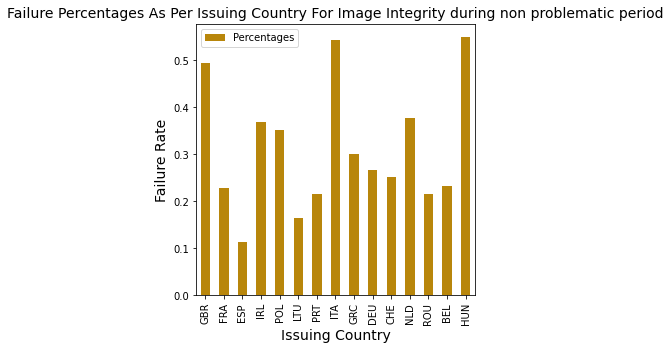

In [69]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['image_integrity_result'] == 1)]['issuing_country'].value_counts()
b=final_data_2['issuing_country'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='darkgoldenrod',figsize=(5,5))
plt.xlabel("Issuing Country",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Issuing Country For Image Integrity during non problematic period",fontsize=14)
plt.show()

In [72]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['image_integrity_result'] == 1)]['gender'].value_counts()
b=final_data_2['gender'].value_counts()
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

Failed Applicants
 Male      117
Female     77
NaN         9
Name: gender, dtype: int64 

Total Applicants
 Male      39754
Female    20689
NaN         288
8             3
MALE          1
FEMALE        1
Name: gender, dtype: int64 

Percentages
 8         0.000000
FEMALE    0.000000
Female    0.372178
MALE      0.000000
Male      0.294310
NaN       3.125000
Name: gender, dtype: float64


Text(0.5, 1.0, 'Failure Percentages As Per Gender For Image Integrity during non problematic period')

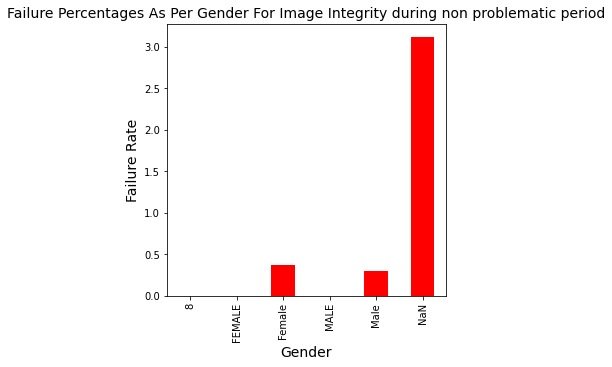

In [73]:
percentages.plot(kind='bar',color='red',figsize=(5,5))
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Gender For Image Integrity during non problematic period",fontsize=14)

In [ ]:
#For the problem period, let us consider the period when the rate of failure rose to more than 20% and sees a rising trend
#For this reason, the period of interest would be from 1st September to 31st October
#We can also use ADF test to test for stationarity and find which months are the most effective
#Let us use the ADF test

x=final_data.groupby(pd.Grouper(key='created_at_docs', freq='D'))[map_encode_all].mean()
May=x[:'2017-05-31']['Passed']
June=x['2017-06-01':'2017-06-30']['Passed']
July=x['2017-07-01':'2017-07-31']['Passed']
August=x['2017-08-01':'2017-08-31']['Passed']
September=x['2017-09-01':'2017-09-30']['Passed']
October=x['2017-10-01':'2017-10-31']['Passed']

In [ ]:
from statsmodels.tsa.stattools import adfuller
result_May=adfuller(May)
print('ADF Statistic for May: %f' % result_May[0])
print('p-value: %f' % result_May[1])
print('Critical Values:')
for key, value in result_May[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic for May: -1.592127
p-value: 0.487547
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803


In [ ]:
result_June=adfuller(June)
print('ADF Statistic for June: %f' % result_June[0])
print('p-value: %f' % result_June[1])
print('Critical Values:')
for key, value in result_June[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic for June: -3.008161
p-value: 0.034139
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630


In [ ]:
result_July=adfuller(July)
print('ADF Statistic for July: %f' % result_July[0])
print('p-value: %f' % result_July[1])
print('Critical Values:')
for key, value in result_July[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic for July: -1.757718
p-value: 0.401646
Critical Values:
	1%: -3.670
	5%: -2.964
	10%: -2.621


In [ ]:
result_August=adfuller(August)
print('ADF Statistic for August: %f' % result_August[0])
print('p-value: %f' % result_August[1])
print('Critical Values:')
for key, value in result_August[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic for August: -3.574457
p-value: 0.006269
Critical Values:
	1%: -3.670
	5%: -2.964
	10%: -2.621


In [ ]:
result_September=adfuller(September)
print('ADF Statistic for September: %f' % result_September[0])
print('p-value: %f' % result_September[1])
print('Critical Values:')
for key, value in result_September[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic for September: -0.708749
p-value: 0.844470
Critical Values:
	1%: -3.689
	5%: -2.972
	10%: -2.625


In [ ]:
October

created_at_docs
2017-10-01 00:00:00+00:00    0.446924
2017-10-02 00:00:00+00:00    0.468691
2017-10-03 00:00:00+00:00    0.438817
2017-10-04 00:00:00+00:00    0.394000
2017-10-05 00:00:00+00:00    0.410797
2017-10-06 00:00:00+00:00    0.405874
2017-10-07 00:00:00+00:00    0.425810
2017-10-08 00:00:00+00:00    0.472037
2017-10-09 00:00:00+00:00    0.470071
2017-10-10 00:00:00+00:00    0.457715
2017-10-11 00:00:00+00:00    0.458944
2017-10-12 00:00:00+00:00    0.440367
2017-10-13 00:00:00+00:00    0.460700
2017-10-14 00:00:00+00:00    0.464555
2017-10-15 00:00:00+00:00    0.375557
2017-10-16 00:00:00+00:00    0.428002
2017-10-17 00:00:00+00:00    0.444047
2017-10-18 00:00:00+00:00    0.434301
2017-10-19 00:00:00+00:00         NaN
2017-10-20 00:00:00+00:00    0.500000
2017-10-21 00:00:00+00:00    1.000000
2017-10-22 00:00:00+00:00    0.487578
2017-10-23 00:00:00+00:00    0.423574
2017-10-24 00:00:00+00:00    0.416248
2017-10-25 00:00:00+00:00    0.468508
2017-10-26 00:00:00+00:00    0.449

In [ ]:
October1=October['2017-10-01':'2017-10-18']
October2=October['2017-10-20':'2017-10-31']
October=pd.concat([October1,October2],axis=0)

In [ ]:
October

created_at_docs
2017-10-01 00:00:00+00:00    0.446924
2017-10-02 00:00:00+00:00    0.468691
2017-10-03 00:00:00+00:00    0.438817
2017-10-04 00:00:00+00:00    0.394000
2017-10-05 00:00:00+00:00    0.410797
2017-10-06 00:00:00+00:00    0.405874
2017-10-07 00:00:00+00:00    0.425810
2017-10-08 00:00:00+00:00    0.472037
2017-10-09 00:00:00+00:00    0.470071
2017-10-10 00:00:00+00:00    0.457715
2017-10-11 00:00:00+00:00    0.458944
2017-10-12 00:00:00+00:00    0.440367
2017-10-13 00:00:00+00:00    0.460700
2017-10-14 00:00:00+00:00    0.464555
2017-10-15 00:00:00+00:00    0.375557
2017-10-16 00:00:00+00:00    0.428002
2017-10-17 00:00:00+00:00    0.444047
2017-10-18 00:00:00+00:00    0.434301
2017-10-20 00:00:00+00:00    0.500000
2017-10-21 00:00:00+00:00    1.000000
2017-10-22 00:00:00+00:00    0.487578
2017-10-23 00:00:00+00:00    0.423574
2017-10-24 00:00:00+00:00    0.416248
2017-10-25 00:00:00+00:00    0.468508
2017-10-26 00:00:00+00:00    0.449124
2017-10-27 00:00:00+00:00    0.411

In [ ]:

result_October=adfuller(October)
print('ADF Statistic for October: %f' % result_October[0])
print('p-value: %f' % result_October[1])
print('Critical Values:')
for key, value in result_October[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic for October: -3.387684
p-value: 0.011386
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623


In [ ]:
May_mean=May.mean()
June_mean=June.mean()
July_mean=July.mean()
August_mean=August.mean()
September_mean=September.mean()
October_mean=October.mean()
print("May mean is "+ str(May_mean))
print("June mean is "+ str(June_mean))
print("July mean is "+ str(July_mean))
print("August mean is "+ str(August_mean))
print("September mean is "+ str(September_mean))
print("October mean is "+ str(October_mean))

May mean is 0.1902656874435702
June mean is 0.09404428849550146
July mean is 0.15171563219505288
August mean is 0.2049389627857795
September mean is 0.28761382227390236
October mean is 0.4382123989710364


In [ ]:
#From the above results, it is clear that our months of focus must be September and October
#Based on the assumption that above 20% failure rate is bad
'''
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['image_integrity_result'] == 1) & (suspected_data['Passed'] == 1)]['issuing_country'].value_counts().plot(kind='bar',color='darkorange')
plt.title("Image Integrity Failure distribution as per issuing country for period of interest")
plt.xlabel("Issuing country")
plt.ylabel("Number of failures")
'''

'\nsuspected_data=final_data_1[(final_data_1[\'created_at_facial\']>=\'2017-09-01\') &(final_data_1[\'created_at_facial\']<=\'2017-10-31\')] \na=suspected_data[(suspected_data[\'image_integrity_result\'] == 1) & (suspected_data[\'Passed\'] == 1)][\'issuing_country\'].value_counts().plot(kind=\'bar\',color=\'darkorange\')\nplt.title("Image Integrity Failure distribution as per issuing country for period of interest")\nplt.xlabel("Issuing country")\nplt.ylabel("Number of failures")\n'

Failed Applicants
 GBR    5103.0
FRA    1758.0
LTU    1099.0
IRL    1045.0
POL     620.0
        ...  
SDN       0.0
CAF       0.0
ZWE       0.0
AGO       0.0
MRT       0.0
Name: issuing_country, Length: 144, dtype: float64 

Total Applicants
 GBR    18237
FRA    12145
LTU     8726
POL     4856
IRL     4613
       ...  
SDN        1
CAF        1
ZWE        1
AGO        1
MRT        1
Name: issuing_country, Length: 144, dtype: int64 

Percentages
      Percentages
GBR    27.981576
FRA    14.475093
LTU    12.594545
POL    12.767710
IRL    22.653371
ESP    14.384049
PRT    17.324561
ITA    14.254306
DEU    16.207585
GRC     9.064112
CHE     8.763693
NLD    17.911791
ROU    12.464855
BEL     7.972973
LVA    20.501475


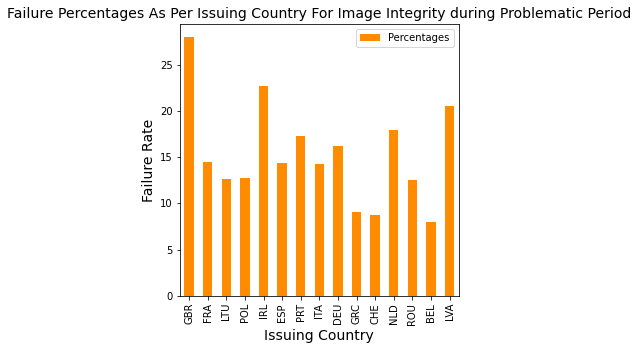

In [70]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['image_integrity_result'] == 1) & (suspected_data['Passed'] == 1)]['issuing_country'].value_counts()
b=suspected_data['issuing_country'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='darkorange',figsize=(5,5))
plt.xlabel("Issuing Country",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Issuing Country For Image Integrity during Problematic Period",fontsize=14)
plt.show()

Failed Applicants
 GBR    1751.0
FRA     864.0
IRL     840.0
LTU     766.0
ESP     500.0
        ...  
072       0.0
ITU       0.0
LIE       0.0
ARE       0.0
SDN       0.0
Name: nationality, Length: 172, dtype: float64 

Total Applicants
 GBR    5586
LTU    5012
ESP    3408
POL    3298
IRL    3279
       ... 
ARE       1
SDN       1
SYC       1
G5R       1
IRQ       1
Name: nationality, Length: 172, dtype: int64 

Percentages
      Percentages
GBR    31.346223
LTU    15.283320
ESP    14.671362
POL    14.281383
IRL    25.617566
FRA    28.170851
PRT    18.741512
DEU    17.740113
ITA    18.624891
ROU    13.112885
CHE    10.600707
NLD    24.655172
BEL     8.228980
HUN    15.576923
LVA    23.449612


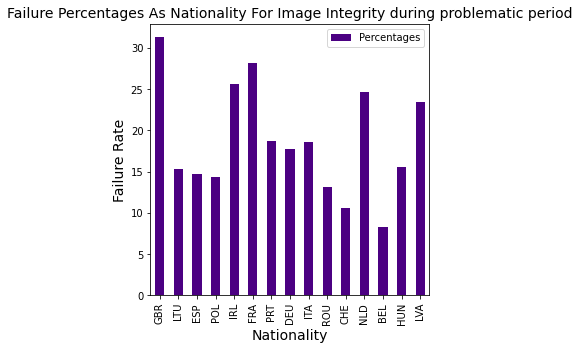

In [66]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['image_integrity_result'] == 1) & (suspected_data['Passed'] == 1)]['nationality'].value_counts()
b=suspected_data['nationality'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='indigo',figsize=(5,5))
plt.xlabel("Nationality",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Nationality For Image Integrity during problematic period",fontsize=14)
plt.show()

In [ ]:
'''
suspected_data[(suspected_data['image_integrity_result'] == 1) & (suspected_data['Passed'] == 1)]['document_type'].value_counts().plot(kind='bar',color='yellowgreen');
plt.title("Image Integrity Failure distribution as per document type for period of interest")
plt.xlabel("Document_type")
plt.ylabel("Number of failures")
'''

'\nsuspected_data[(suspected_data[\'image_integrity_result\'] == 1) & (suspected_data[\'Passed\'] == 1)][\'document_type\'].value_counts().plot(kind=\'bar\',color=\'yellowgreen\');\nplt.title("Image Integrity Failure distribution as per document type for period of interest")\nplt.xlabel("Document_type")\nplt.ylabel("Number of failures")\n'

Failed Applicants
 passport                  5416
driving_licence           4470
national_identity_card    3383
residence_permit           137
work_permit                  1
Name: document_type, dtype: int64 

Total Applicants
 passport                  20288
driving_licence           24907
national_identity_card    28800
residence_permit           1478
work_permit                  10
dtype: int64 

Percentages
 passport                  26.695584
driving_licence           17.946762
national_identity_card    11.746528
residence_permit           9.269283
work_permit               10.000000
dtype: float64


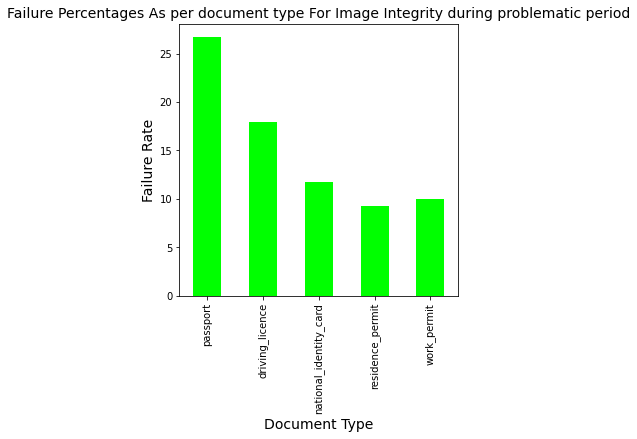

In [68]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['image_integrity_result'] == 1) & (suspected_data['Passed'] == 1)]['document_type'].value_counts()
b=suspected_data['document_type'].value_counts()
dictionary={}
for item in a.index:
  dictionary[item]=b[item]
b=pd.Series(dictionary)
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='lime',figsize=(5,5))
plt.xlabel("Document Type",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As per document type For Image Integrity during problematic period",fontsize=14)
plt.show()

Failed Applicants
 Male      7547
Female    4191
NaN        111
Name: gender, dtype: int64 

Total Applicants
 Male      38643
Female    20847
NaN         342
dtype: int64 

Percentages
 Male      19.530057
Female    20.103612
NaN       32.456140
dtype: float64


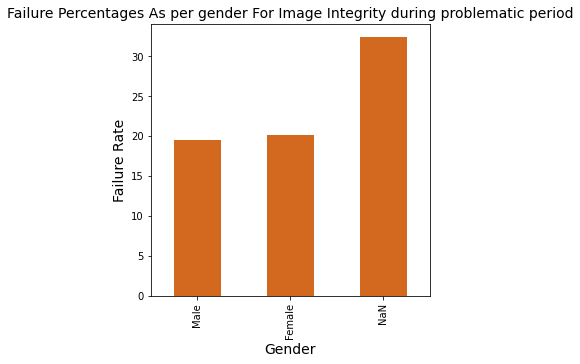

In [74]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['image_integrity_result'] == 1) & (suspected_data['Passed'] == 1)]['gender'].value_counts()
b=suspected_data['gender'].value_counts()
dictionary={}
for item in a.index:
  dictionary[item]=b[item]
b=pd.Series(dictionary)
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='chocolate',figsize=(5,5))
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As per gender For Image Integrity during problematic period",fontsize=14)
plt.show()

## **facial_image_integrity_result**

Failed Applicants
 Male      820
Female    390
NaN         7
Name: gender, dtype: int64 

Total Applicants
 Male      38643
Female    20847
NaN         342
dtype: int64 

Percentages
 Male      2.121988
Female    1.870773
NaN       2.046784
dtype: float64


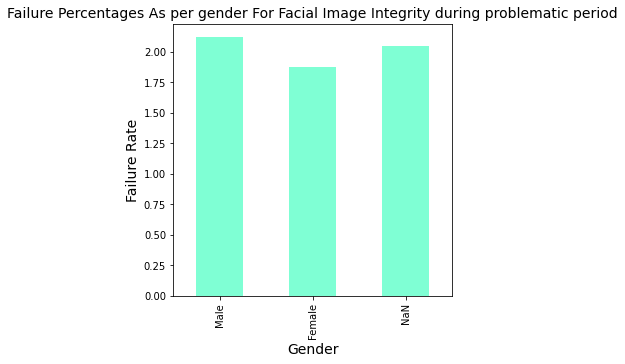

In [82]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['facial_image_integrity_result'] == 1) & (suspected_data['Passed'] == 1)]['gender'].value_counts()
b=suspected_data['gender'].value_counts()
dictionary={}
for item in a.index:
  dictionary[item]=b[item]
b=pd.Series(dictionary)
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='aquamarine',figsize=(5,5))
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As per gender For Facial Image Integrity during problematic period",fontsize=14)
plt.show()

Failed Applicants
 national_identity_card    847.0
driving_licence           662.0
passport                  284.0
residence_permit           46.0
work_permit                 0.0
voter_id                    0.0
tax_id                      0.0
Name: document_type, dtype: float64 

Total Applicants
 national_identity_card    28800
driving_licence           24907
passport                  20288
residence_permit           1478
work_permit                  10
voter_id                      5
tax_id                        4
Name: document_type, dtype: int64 

Percentages
                         Percentages
national_identity_card     2.940972
driving_licence            2.657887
passport                   1.399842
residence_permit           3.112314
work_permit                0.000000
voter_id                   0.000000
tax_id                     0.000000


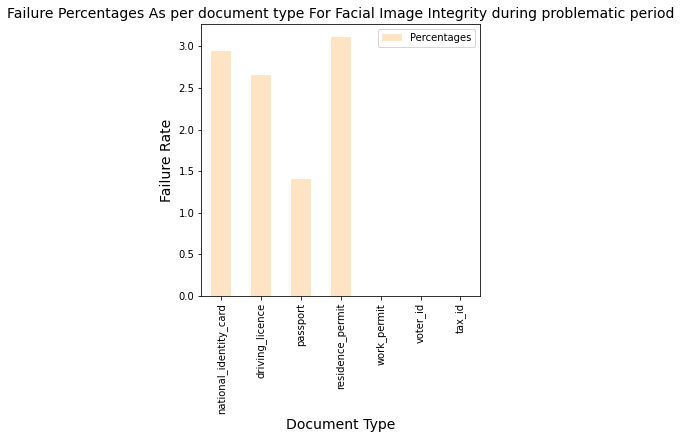

In [78]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['facial_image_integrity_result'] == 1) & (suspected_data['Passed'] == 1)]['document_type'].value_counts()
b=suspected_data['document_type'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='bisque',figsize=(5,5))
plt.xlabel("Document Type",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As per document type For Facial Image Integrity during problematic period",fontsize=14)
plt.show()

Failed Applicants
 LTU    240.0
GBR    130.0
ESP     74.0
FRA     43.0
POL     35.0
       ...  
ARE      0.0
SDN      0.0
SYC      0.0
G5R      0.0
IRQ      0.0
Name: nationality, Length: 172, dtype: float64 

Total Applicants
 GBR    5586
LTU    5012
ESP    3408
POL    3298
IRL    3279
       ... 
ARE       1
SDN       1
SYC       1
G5R       1
IRQ       1
Name: nationality, Length: 172, dtype: int64 

Percentages
      Percentages
GBR     2.327247
LTU     4.788508
ESP     2.171362
POL     1.061249
IRL     0.518451
FRA     1.402022
PRT     0.995926
DEU     1.468927
ITA     2.523934
ROU     1.254276
CHE     0.706714
NLD     0.344828
BEL     0.357782
HUN     1.923077
LVA     0.968992


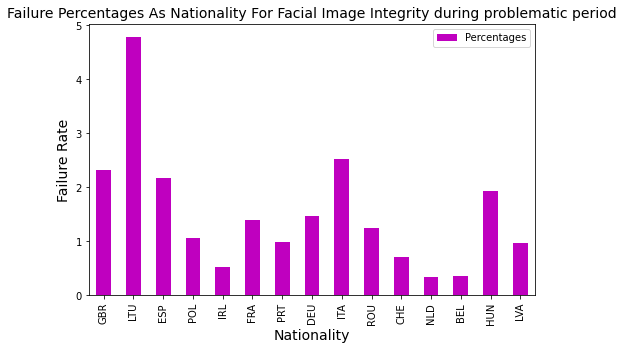

In [75]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['facial_image_integrity_result'] == 1) & (suspected_data['Passed'] == 1)]['nationality'].value_counts()
b=suspected_data['nationality'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)
percentages.plot(kind='bar',color='m',figsize=(8,5))
plt.xlabel("Nationality",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Nationality For Facial Image Integrity during problematic period",fontsize=14)
plt.show()

Failed Applicants
 GBR    425.0
LTU    380.0
ITA    205.0
FRA    188.0
ESP    108.0
       ...  
SYC      0.0
SDN      0.0
CAF      0.0
AGO      0.0
MRT      0.0
Name: issuing_country, Length: 144, dtype: float64 

Total Applicants
 GBR    18237
FRA    12145
LTU     8726
POL     4856
IRL     4613
       ...  
SDN        1
CAF        1
ZWE        1
AGO        1
MRT        1
Name: issuing_country, Length: 144, dtype: int64 

Percentages
      Percentages
GBR     2.330427
FRA     1.547962
LTU     4.354802
POL     1.482702
IRL     1.170605
ESP     2.563494
PRT     1.864035
ITA     7.511909
DEU     1.676647
GRC     7.885041
CHE     1.330203
NLD     1.080108
ROU     1.124649
BEL     1.351351
LVA     0.884956


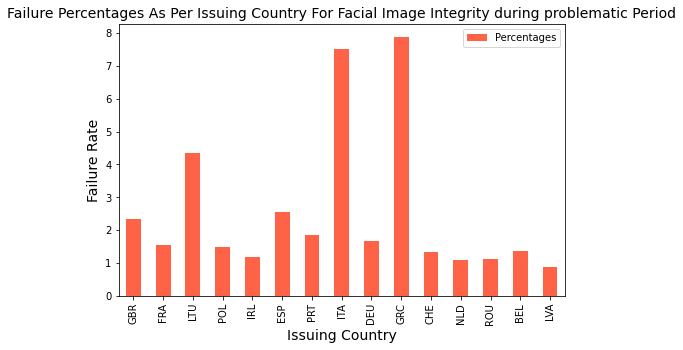

In [80]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['facial_image_integrity_result'] == 1) & (suspected_data['Passed'] == 1)]['issuing_country'].value_counts()
b=suspected_data['issuing_country'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='tomato',figsize=(8,5))
plt.xlabel("Issuing Country",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Issuing Country For Facial Image Integrity during problematic Period",fontsize=14)
plt.show()

Failed Applicants
 GBR    533.0
ESP    251.0
LTU    224.0
FRA    163.0
ITA     79.0
       ...  
<B0      0.0
DN<      0.0
PSE      0.0
SDN      0.0
ARE      0.0
Name: nationality, Length: 182, dtype: float64 

Total Applicants
 GBR    7066
ESP    4355
FRA    3622
POL    2845
IRL    2808
       ... 
<B0       1
DN<       1
PSE       1
SDN       1
ARE       1
Name: nationality, Length: 182, dtype: int64 

Percentages
      Percentages
GBR     7.543164
ESP     5.763490
FRA     4.500276
POL     2.003515
IRL     2.136752
LTU     8.760266
PRT     2.403204
DEU     3.352770
CHE     1.401401
ITA     7.971746
ROU     3.217503
NLD     2.982732
BEL     4.928458
GRC     4.384486
HUN     1.996370


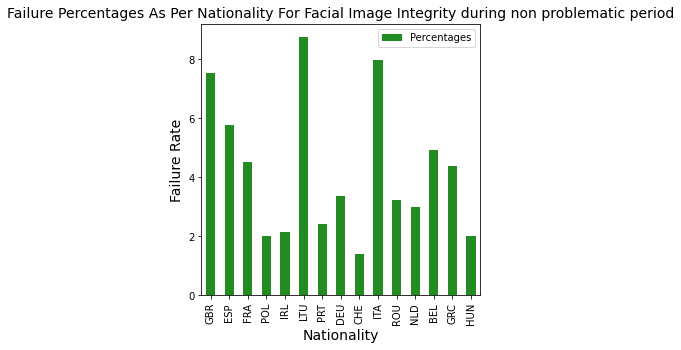

In [76]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['facial_image_integrity_result'] == 1)]['nationality'].value_counts()
b=final_data_2['nationality'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='forestgreen',figsize=(5,5))
plt.xlabel("Nationality",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Nationality For Facial Image Integrity during non problematic period",fontsize=14)
plt.show()

Failed Applicants
 driving_licence           1754
national_identity_card    1234
passport                  1110
residence_permit            90
birth_certificate            1
Name: document_type, dtype: int64 

Total Applicants
 driving_licence           25585
national_identity_card    25813
passport                  21940
residence_permit           1451
birth_certificate             1
dtype: int64 

Percentages
 driving_licence             6.855579
national_identity_card      4.780537
passport                    5.059253
residence_permit            6.202619
birth_certificate         100.000000
dtype: float64


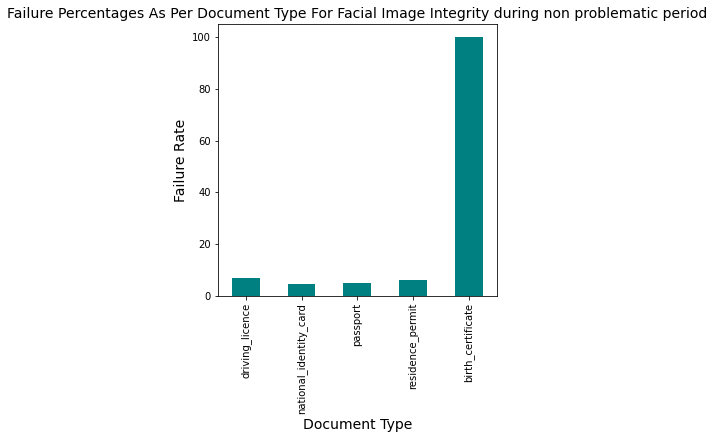

In [77]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['facial_image_integrity_result'] == 1)]['document_type'].value_counts()
b=final_data_2['document_type'].value_counts()
dictionary={}
for item in a.index:
  dictionary[item]=b[item]
b=pd.Series(dictionary)
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='teal',figsize=(5,5))
plt.xlabel("Document Type",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Document Type For Facial Image Integrity during non problematic period",fontsize=14)
plt.show()

Failed Applicants
 GBR    1480.0
FRA     474.0
ESP     330.0
LTU     325.0
GRC     319.0
        ...  
JAM       0.0
TTO       0.0
AFG       0.0
BRB       0.0
GIN       0.0
Name: issuing_country, Length: 150, dtype: float64 

Total Applicants
 GBR    21444
FRA    11377
ESP     5251
IRL     4619
POL     4254
       ...  
JAM        1
TTO        1
AFG        1
BRB        1
GIN        1
Name: issuing_country, Length: 150, dtype: int64 

Percentages
      Percentages
GBR     6.901697
FRA     4.166300
ESP     6.284517
IRL     3.875298
POL     2.938411
LTU     7.648859
PRT     4.355652
ITA    10.793494
GRC    16.030151
DEU     3.717472
CHE     2.194357
NLD     2.934537
ROU     3.433476
BEL     5.017503
HUN     1.925722


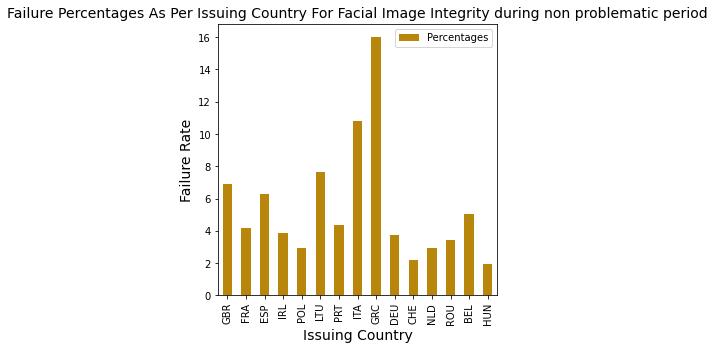

In [79]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['facial_image_integrity_result'] == 1)]['issuing_country'].value_counts()
b=final_data_2['issuing_country'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='darkgoldenrod',figsize=(5,5))
plt.xlabel("Issuing Country",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Issuing Country For Facial Image Integrity during non problematic period",fontsize=14)
plt.show()

Failed Applicants
 Male      2068
Female     990
NaN         25
Name: gender, dtype: int64 

Total Applicants
 Male      39754
Female    20689
NaN         288
8             3
MALE          1
FEMALE        1
Name: gender, dtype: int64 

Percentages
 8         0.000000
FEMALE    0.000000
Female    4.785152
MALE      0.000000
Male      5.201992
NaN       8.680556
Name: gender, dtype: float64


Text(0.5, 1.0, 'Failure Percentages As Per Gender For Facial Image Integrity during non problematic period')

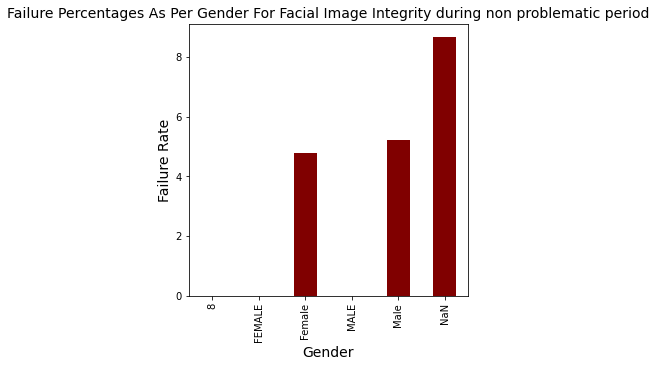

In [81]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['facial_image_integrity_result'] == 1)]['gender'].value_counts()
b=final_data_2['gender'].value_counts()
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='maroon',figsize=(5,5))
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Gender For Facial Image Integrity during non problematic period",fontsize=14)

# image_quality_result

Failed Applicants
 Female    1
Name: gender, dtype: int64 

Total Applicants
 Female    20847
dtype: int64 

Percentages
 Female    0.004797
dtype: float64


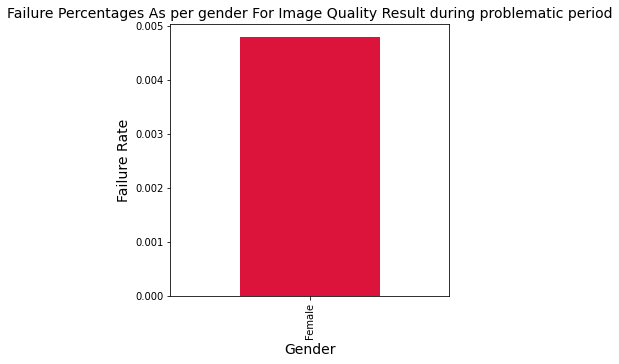

In [90]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['image_quality_result'] == 1) & (suspected_data['Passed'] == 1)]['gender'].value_counts()
b=suspected_data['gender'].value_counts()
dictionary={}
for item in a.index:
  dictionary[item]=b[item]
b=pd.Series(dictionary)
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='crimson',figsize=(5,5))
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As per gender For Image Quality Result during problematic period",fontsize=14)
plt.show()

Failed Applicants
 driving_licence           3
passport                  1
national_identity_card    1
Name: document_type, dtype: int64 

Total Applicants
 driving_licence           24907
passport                  20288
national_identity_card    28800
dtype: int64 

Percentages
 driving_licence           0.012045
passport                  0.004929
national_identity_card    0.003472
dtype: float64


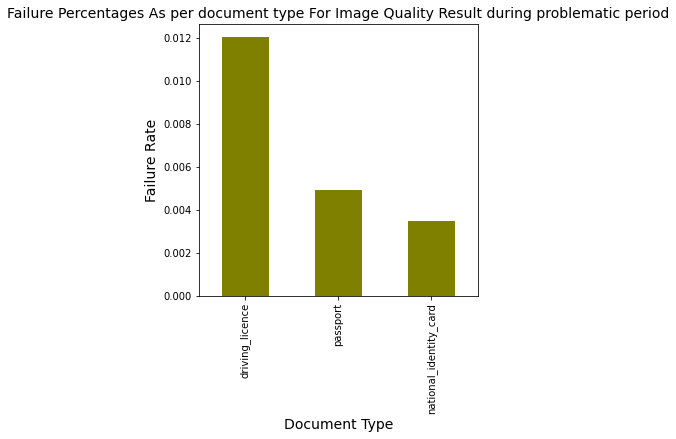

In [87]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['image_quality_result'] == 1) & (suspected_data['Passed'] == 1)]['document_type'].value_counts()
b=suspected_data['document_type'].value_counts()
dictionary={}
for item in a.index:
  dictionary[item]=b[item]
b=pd.Series(dictionary)
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='olive',figsize=(5,5))
plt.xlabel("Document Type",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As per document type For Image Quality Result during problematic period",fontsize=14)
plt.show()

Failed Applicants
 SVN    1.0
GBR    0.0
LTU    0.0
ESP    0.0
POL    0.0
      ... 
ARE    0.0
SDN    0.0
SYC    0.0
G5R    0.0
IRQ    0.0
Name: nationality, Length: 172, dtype: float64 

Total Applicants
 GBR    5586
LTU    5012
ESP    3408
POL    3298
IRL    3279
       ... 
ARE       1
SDN       1
SYC       1
G5R       1
IRQ       1
Name: nationality, Length: 172, dtype: int64 

Percentages
      Percentages
GBR          0.0
LTU          0.0
ESP          0.0
POL          0.0
IRL          0.0
FRA          0.0
PRT          0.0
DEU          0.0
ITA          0.0
ROU          0.0
CHE          0.0
NLD          0.0
BEL          0.0
HUN          0.0
LVA          0.0


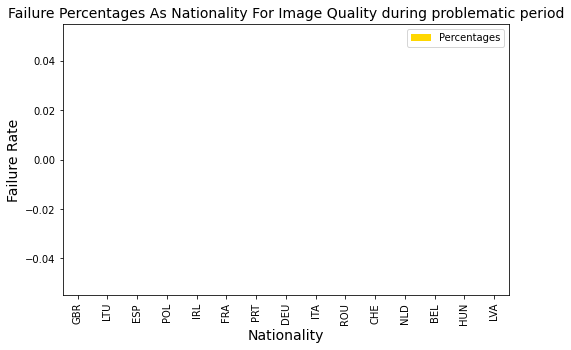

In [84]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['image_quality_result'] == 1) & (suspected_data['Passed'] == 1)]['nationality'].value_counts()
b=suspected_data['nationality'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='gold',figsize=(8,5))
plt.xlabel("Nationality",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Nationality For Image Quality during problematic period",fontsize=14)
plt.show()

Failed Applicants
 IRL    1.0
DEU    1.0
NLD    1.0
SVN    1.0
HUN    1.0
      ... 
SDN    0.0
CAF    0.0
ZWE    0.0
AGO    0.0
MRT    0.0
Name: issuing_country, Length: 144, dtype: float64 

Total Applicants
 GBR    18237
FRA    12145
LTU     8726
POL     4856
IRL     4613
       ...  
SDN        1
CAF        1
ZWE        1
AGO        1
MRT        1
Name: issuing_country, Length: 144, dtype: int64 

Percentages
      Percentages
GBR     0.005483
FRA     0.000000
LTU     0.000000
POL     0.000000
IRL     0.021678
ESP     0.000000
PRT     0.000000
ITA     0.000000
DEU     0.039920
GRC     0.000000
CHE     0.000000
NLD     0.090009
ROU     0.000000
BEL     0.000000
LVA     0.000000


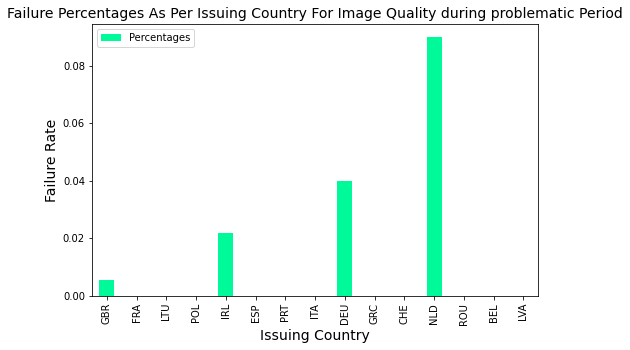

In [89]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['image_quality_result'] == 1) & (suspected_data['Passed'] == 1)]['issuing_country'].value_counts()
b=suspected_data['issuing_country'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)
percentages.plot(kind='bar',color='mediumspringgreen',figsize=(8,5))
plt.xlabel("Issuing Country",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Issuing Country For Image Quality during problematic Period",fontsize=14)
plt.show()

Failed Applicants
 GBR    0.0
ESP    0.0
FRA    0.0
POL    0.0
IRL    0.0
      ... 
<B0    0.0
DN<    0.0
PSE    0.0
SDN    0.0
ARE    0.0
Name: nationality, Length: 182, dtype: float64 

Total Applicants
 GBR    7066
ESP    4355
FRA    3622
POL    2845
IRL    2808
       ... 
<B0       1
DN<       1
PSE       1
SDN       1
ARE       1
Name: nationality, Length: 182, dtype: int64 

Percentages
      Percentages
GBR          0.0
ESP          0.0
FRA          0.0
POL          0.0
IRL          0.0
LTU          0.0
PRT          0.0
DEU          0.0
CHE          0.0
ITA          0.0
ROU          0.0
NLD          0.0
BEL          0.0
GRC          0.0
HUN          0.0


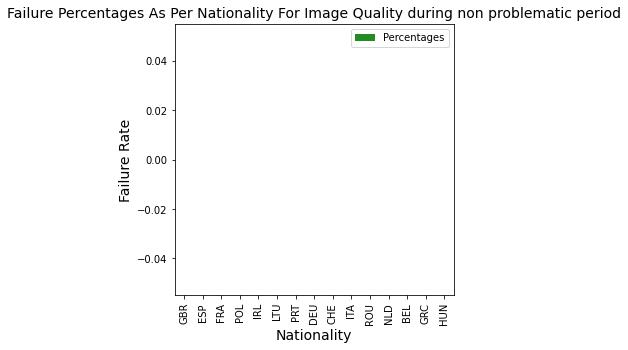

In [85]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['image_quality_result'] == 1)]['nationality'].value_counts()
b=final_data_2['nationality'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='forestgreen',figsize=(5,5))
plt.xlabel("Nationality",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Nationality For Image Quality during non problematic period",fontsize=14)
plt.show()

Failed Applicants
 driving_licence    4
Name: document_type, dtype: int64 

Total Applicants
 driving_licence    25585
dtype: int64 

Percentages
 driving_licence    0.015634
dtype: float64


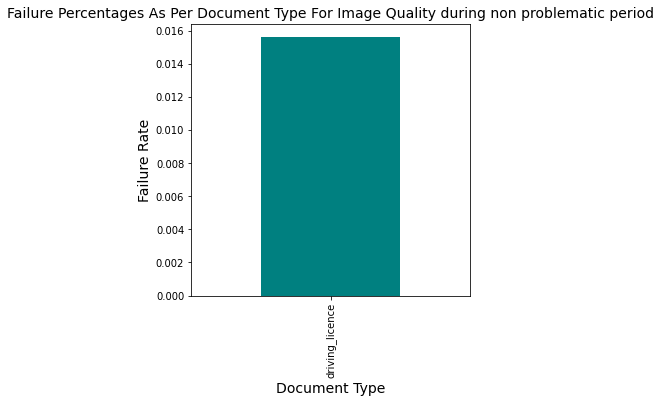

In [86]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['image_quality_result'] == 1)]['document_type'].value_counts()
b=final_data_2['document_type'].value_counts()
dictionary={}
for item in a.index:
  dictionary[item]=b[item]
b=pd.Series(dictionary)
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='teal',figsize=(5,5))
plt.xlabel("Document Type",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Document Type For Image Quality during non problematic period",fontsize=14)
plt.show()

Failed Applicants
 SVN    2
IRL    2
ITA    1
DEU    1
NLD    1
LTU    1
CAN    1
HUN    1
GBR    1
Name: issuing_country, dtype: int64 

Total Applicants
 SVN      940
IRL     9232
ITA     4758
DEU     4388
NLD     2440
LTU    12975
CAN      247
HUN     1374
GBR    39681
dtype: int64 

Percentages
 SVN    0.212766
IRL    0.021664
ITA    0.021017
DEU    0.022789
NLD    0.040984
LTU    0.007707
CAN    0.404858
HUN    0.072780
GBR    0.002520
dtype: float64


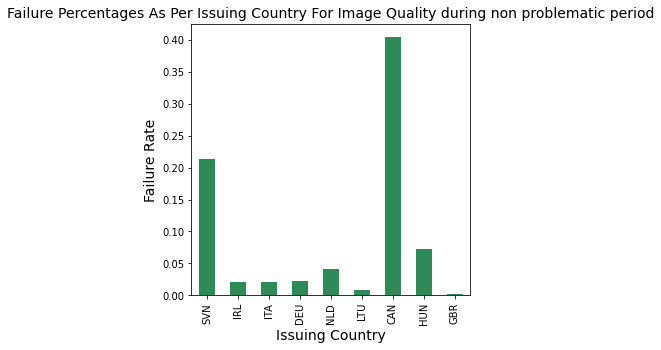

In [88]:
a=final_data_1[(final_data_1['Passed'] == 1) & (final_data_1['image_quality_result'] == 1)]['issuing_country'].value_counts()[:15]
b=final_data_1['issuing_country'].value_counts()
dictionary={}
for item in a.index:
  dictionary[item]=b[item]
b=pd.Series(dictionary)
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='seagreen',figsize=(5,5))
plt.xlabel("Issuing Country",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Issuing Country For Image Quality during non problematic period",fontsize=14)
plt.show()

Failed Applicants
 Series([], Name: gender, dtype: int64) 

Total Applicants
 Male      39754
Female    20689
NaN         288
8             3
MALE          1
FEMALE        1
Name: gender, dtype: int64 

Percentages
 Male      0.0
Female    0.0
NaN       0.0
8         0.0
MALE      0.0
FEMALE    0.0
Name: gender, dtype: float64


Text(0.5, 1.0, 'Failure Percentages As Per Gender For Image Quality during non problematic period')

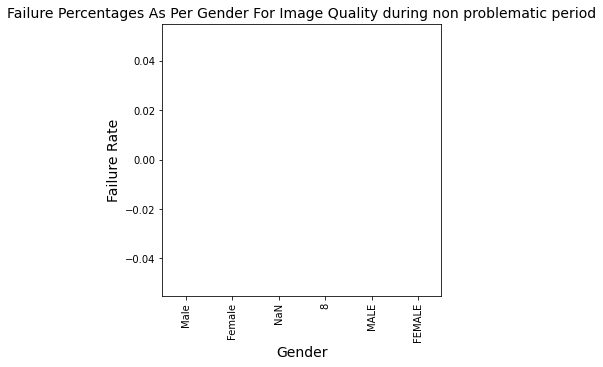

In [92]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['image_quality_result'] == 1)]['gender'].value_counts()
b=final_data_2['gender'].value_counts()
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='lightcoral',figsize=(5,5))
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Gender For Image Quality during non problematic period",fontsize=14)

#conclusive_document_quality_result

Failed Applicants
 Male      7508
Female    4172
NaN        111
Name: gender, dtype: int64 

Total Applicants
 Male      38643
Female    20847
NaN         342
dtype: int64 

Percentages
 Male      19.429133
Female    20.012472
NaN       32.456140
dtype: float64


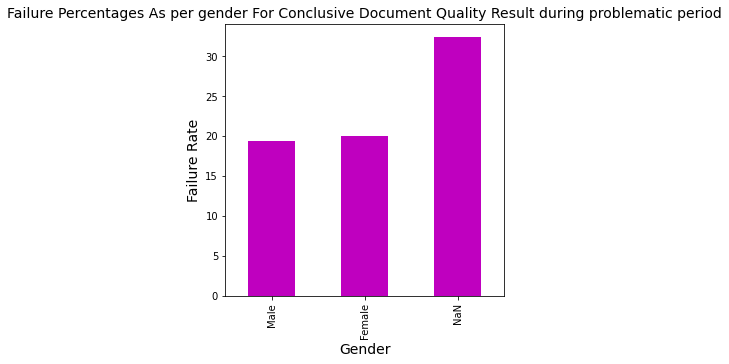

In [93]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['conclusive_document_quality_result'] == 1) & (suspected_data['Passed'] == 1)]['gender'].value_counts()
b=suspected_data['gender'].value_counts()
dictionary={}
for item in a.index:
  dictionary[item]=b[item]
b=pd.Series(dictionary)
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='m',figsize=(5,5))
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As per gender For Conclusive Document Quality Result during problematic period",fontsize=14)
plt.show()

Failed Applicants
 passport                  5383.0
driving_licence           4465.0
national_identity_card    3350.0
residence_permit           137.0
work_permit                  1.0
voter_id                     0.0
tax_id                       0.0
Name: document_type, dtype: float64 

Total Applicants
 national_identity_card    28800
driving_licence           24907
passport                  20288
residence_permit           1478
work_permit                  10
voter_id                      5
tax_id                        4
Name: document_type, dtype: int64 

Percentages
                         Percentages
national_identity_card    11.631944
driving_licence           17.926687
passport                  26.532926
residence_permit           9.269283
work_permit               10.000000
voter_id                   0.000000
tax_id                     0.000000


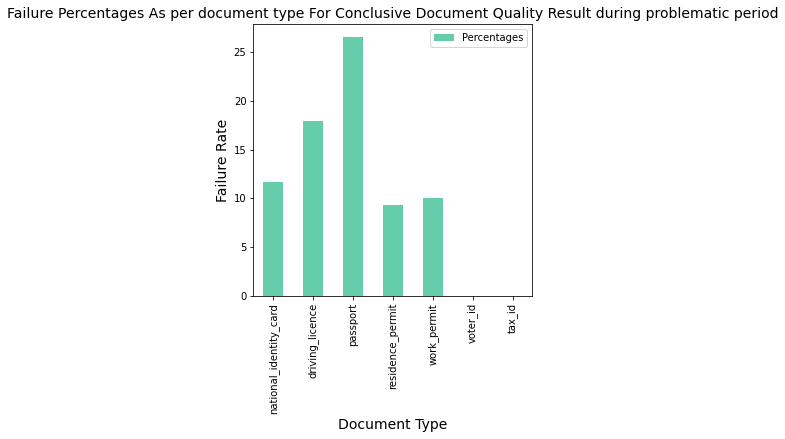

In [95]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['conclusive_document_quality_result'] == 1) & (suspected_data['Passed'] == 1)]['document_type'].value_counts()[:15]
b=suspected_data['document_type'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='mediumaquamarine',figsize=(5,5))
plt.xlabel("Document Type",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As per document type For Conclusive Document Quality Result during problematic period",fontsize=14)
plt.show()

Failed Applicants
 GBR    1749.0
FRA     861.0
IRL     827.0
LTU     763.0
ESP     500.0
        ...  
072       0.0
ITU       0.0
LIE       0.0
ARE       0.0
SDN       0.0
Name: nationality, Length: 172, dtype: float64 

Total Applicants
 GBR    5586
LTU    5012
ESP    3408
POL    3298
IRL    3279
       ... 
ARE       1
SDN       1
SYC       1
G5R       1
IRQ       1
Name: nationality, Length: 172, dtype: int64 

Percentages
      Percentages
GBR    31.310419
LTU    15.223464
ESP    14.671362
POL    14.281383
IRL    25.221104
FRA    28.073036
PRT    18.696243
DEU    17.740113
ITA    18.537859
ROU    13.112885
CHE    10.600707
NLD    24.482759
BEL     8.228980
HUN    15.384615
LVA    23.255814


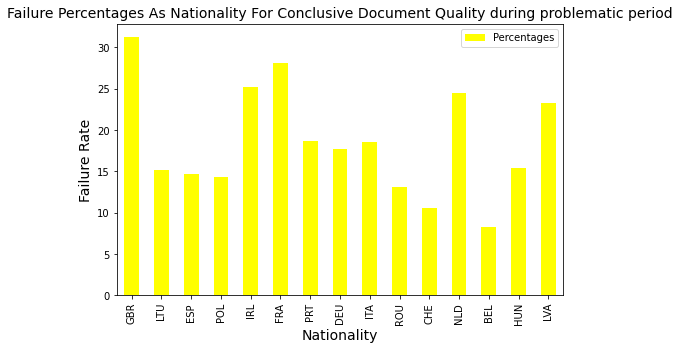

In [96]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['conclusive_document_quality_result'] == 1) & (suspected_data['Passed'] == 1)]['nationality'].value_counts()
b=suspected_data['nationality'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='yellow',figsize=(8,5))
plt.xlabel("Nationality",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Nationality For Conclusive Document Quality during problematic period",fontsize=14)
plt.show()

Failed Applicants
 GBR    5099.0
FRA    1737.0
LTU    1095.0
IRL    1031.0
POL     618.0
        ...  
SDN       0.0
CAF       0.0
ZWE       0.0
AGO       0.0
MRT       0.0
Name: issuing_country, Length: 144, dtype: float64 

Total Applicants
 GBR    18237
FRA    12145
LTU     8726
POL     4856
IRL     4613
       ...  
SDN        1
CAF        1
ZWE        1
AGO        1
MRT        1
Name: issuing_country, Length: 144, dtype: int64 

Percentages
      Percentages
GBR    27.959642
FRA    14.302182
LTU    12.548705
POL    12.726524
IRL    22.349881
ESP    14.360313
PRT    17.288012
ITA    13.961158
DEU    16.167665
GRC     8.916728
CHE     8.763693
NLD    17.731773
ROU    12.464855
BEL     7.972973
LVA    20.353982


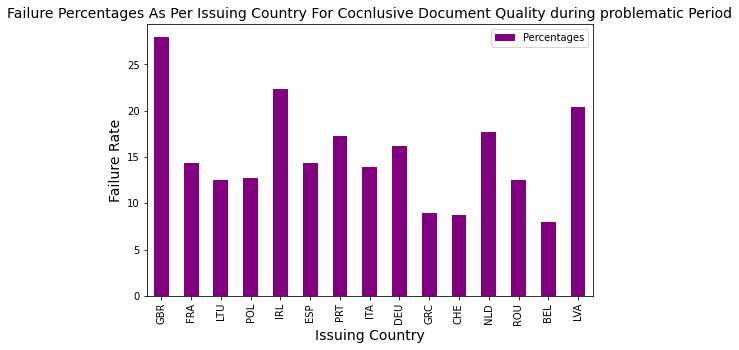

In [97]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['conclusive_document_quality_result'] == 1) & (suspected_data['Passed'] == 1)]['issuing_country'].value_counts()
b=suspected_data['issuing_country'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='purple',figsize=(8,5))
plt.xlabel("Issuing Country",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Issuing Country For Cocnlusive Document Quality during problematic Period",fontsize=14)
plt.show()

Failed Applicants
 GBR    24.0
FRA     9.0
POL     6.0
ITA     5.0
IRL     5.0
       ... 
<B0     0.0
DN<     0.0
PSE     0.0
SDN     0.0
ARE     0.0
Name: nationality, Length: 182, dtype: float64 

Total Applicants
 GBR    7066
ESP    4355
FRA    3622
POL    2845
IRL    2808
       ... 
<B0       1
DN<       1
PSE       1
SDN       1
ARE       1
Name: nationality, Length: 182, dtype: int64 

Percentages
      Percentages
GBR     0.339655
ESP     0.091848
FRA     0.248482
POL     0.210896
IRL     0.178063
LTU     0.078217
PRT     0.133511
DEU     0.072886
CHE     0.100100
ITA     0.504541
ROU     0.128700
NLD     0.313972
BEL     0.317965
GRC     0.000000
HUN     0.725953


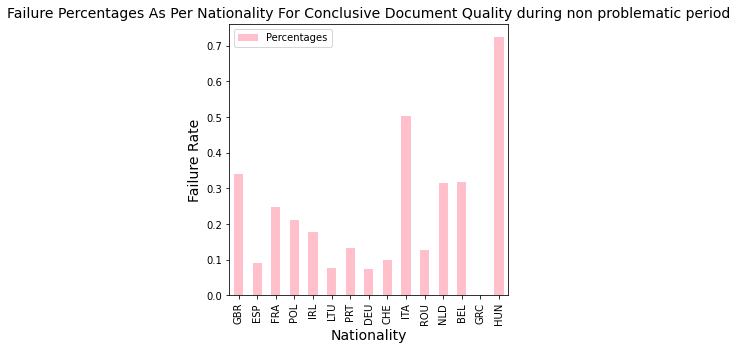

In [98]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['conclusive_document_quality_result'] == 1)]['nationality'].value_counts()
b=final_data_2['nationality'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='pink',figsize=(5,5))
plt.xlabel("Nationality",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Nationality For Conclusive Document Quality during non problematic period",fontsize=14)
plt.show()

Failed Applicants
 driving_licence           121
passport                   69
national_identity_card     35
residence_permit            4
Name: document_type, dtype: int64 

Total Applicants
 driving_licence           25585
passport                  21940
national_identity_card    25813
residence_permit           1451
dtype: int64 

Percentages
 driving_licence           0.472933
passport                  0.314494
national_identity_card    0.135591
residence_permit          0.275672
dtype: float64


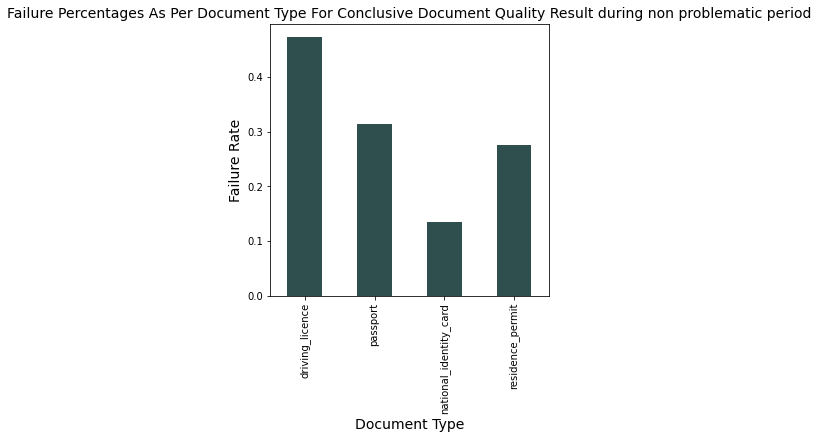

In [101]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['conclusive_document_quality_result'] == 1)]['document_type'].value_counts()
b=final_data_2['document_type'].value_counts()
dictionary={}
for item in a.index:
  dictionary[item]=b[item]
b=pd.Series(dictionary)
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='darkslategray',figsize=(5,5))
plt.xlabel("Document Type",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Document Type For Conclusive Document Quality Result during non problematic period",fontsize=14)
plt.show()

Failed Applicants
 GBR    106.0
FRA     19.0
POL     15.0
ITA      9.0
IRL      8.0
       ...  
JAM      0.0
TTO      0.0
AFG      0.0
BRB      0.0
GIN      0.0
Name: issuing_country, Length: 150, dtype: float64 

Total Applicants
 GBR    21444
FRA    11377
ESP     5251
IRL     4619
POL     4254
       ...  
JAM        1
TTO        1
AFG        1
BRB        1
GIN        1
Name: issuing_country, Length: 150, dtype: int64 

Percentages
      Percentages
GBR     0.494311
FRA     0.167004
ESP     0.114264
IRL     0.173198
POL     0.352609
LTU     0.141210
PRT     0.179986
ITA     0.443568
GRC     0.301508
DEU     0.265534
CHE     0.250784
NLD     0.376223
ROU     0.214592
BEL     0.233372
HUN     0.550206


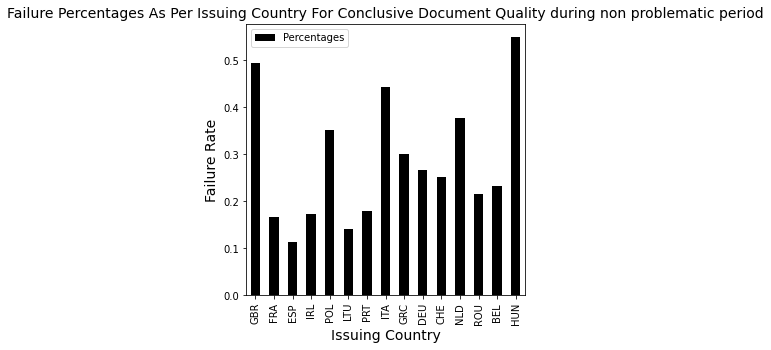

In [102]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['conclusive_document_quality_result'] == 1)]['issuing_country'].value_counts()
b=final_data_2['issuing_country'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='black',figsize=(5,5))
plt.xlabel("Issuing Country",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Issuing Country For Conclusive Document Quality during non problematic period",fontsize=14)
plt.show()

Failed Applicants
 Male      102
Female     71
NaN         8
Name: gender, dtype: int64 

Total Applicants
 Male      39754
Female    20689
NaN         288
8             3
MALE          1
FEMALE        1
Name: gender, dtype: int64 

Percentages
 8         0.000000
FEMALE    0.000000
Female    0.343178
MALE      0.000000
Male      0.256578
NaN       2.777778
Name: gender, dtype: float64


Text(0.5, 1.0, 'Failure Percentages As Per Gender For Conclusive Document Quality for non problematic period')

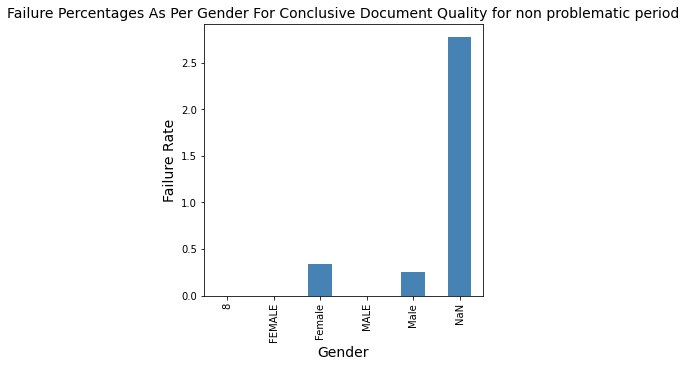

In [103]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['conclusive_document_quality_result'] == 1)]['gender'].value_counts()
b=final_data_2['gender'].value_counts()
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='steelblue',figsize=(5,5))
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Gender For Conclusive Document Quality for non problematic period",fontsize=14)

# result_facial

Failed Applicants
 Male      978
Female    531
NaN        10
Name: gender, dtype: int64 

Total Applicants
 Male      38643
Female    20847
NaN         342
dtype: int64 

Percentages
 Male      2.530859
Female    2.547129
NaN       2.923977
dtype: float64


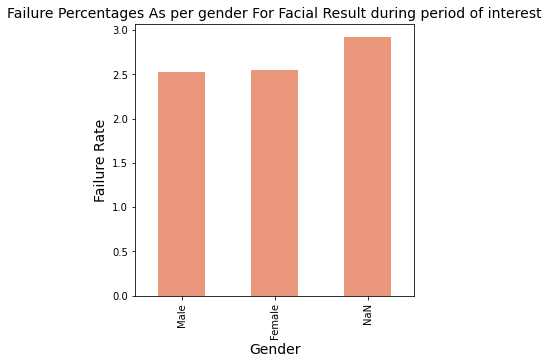

In [ ]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['result_facial'] == 1) & (suspected_data['Passed'] == 1)]['gender'].value_counts()
b=suspected_data['gender'].value_counts()
dictionary={}
for item in a.index:
  dictionary[item]=b[item]
b=pd.Series(dictionary)
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='darksalmon',figsize=(5,5))
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As per gender For Facial Result during period of interest",fontsize=14)
plt.show()

Failed Applicants
 national_identity_card    1020.0
driving_licence            784.0
passport                   371.0
residence_permit            52.0
work_permit                  0.0
voter_id                     0.0
tax_id                       0.0
Name: document_type, dtype: float64 

Total Applicants
 national_identity_card    28800
driving_licence           24907
passport                  20288
residence_permit           1478
work_permit                  10
voter_id                      5
tax_id                        4
Name: document_type, dtype: int64 

Percentages
                         Percentages
national_identity_card     3.541667
driving_licence            3.147709
passport                   1.828667
residence_permit           3.518268
work_permit                0.000000
voter_id                   0.000000
tax_id                     0.000000


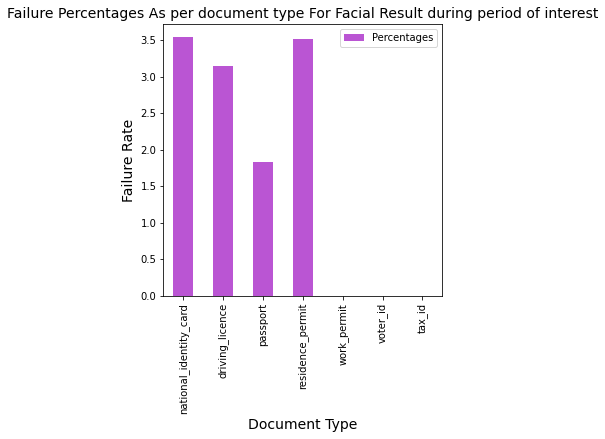

In [ ]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['result_facial'] == 1) & (suspected_data['Passed'] == 1)]['document_type'].value_counts()
b=suspected_data['document_type'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='mediumorchid',figsize=(5,5))
plt.xlabel("Document Type",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As per document type For Facial Result during period of interest",fontsize=14)
plt.show()

Failed Applicants
 LTU    269.0
GBR    148.0
ESP     91.0
FRA     62.0
POL     45.0
       ...  
CAF      0.0
G8R      0.0
SYC      0.0
1GT      0.0
BWA      0.0
Name: nationality, Length: 172, dtype: float64 

Total Applicants
 GBR    5586
LTU    5012
ESP    3408
POL    3298
IRL    3279
       ... 
CAF       1
G8R       1
SYC       1
1GT       1
BWA       1
Name: nationality, Length: 172, dtype: int64 

Percentages
      Percentages
GBR     2.649481
LTU     5.367119
ESP     2.670188
POL     1.364463
IRL     0.548948
FRA     2.021519
PRT     1.267542
DEU     1.920904
ITA     2.872063
ROU     1.596351
CHE     0.942285
NLD     1.724138
BEL     0.894454
HUN     1.923077
LVA     0.968992


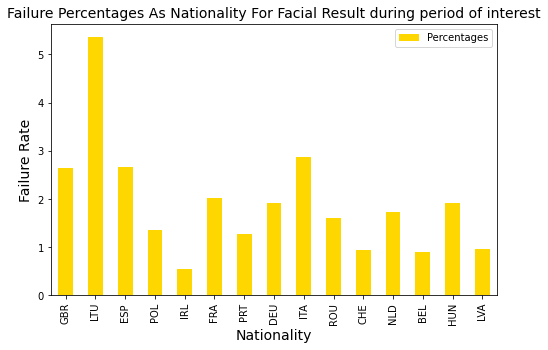

In [ ]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['result_facial'] == 1) & (suspected_data['Passed'] == 1)]['nationality'].value_counts()
b=suspected_data['nationality'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='gold',figsize=(8,5))
plt.xlabel("Nationality",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Nationality For Facial Result during period of interest",fontsize=14)
plt.show()

Failed Applicants
 GBR    493.0
LTU    432.0
FRA    297.0
ITA    223.0
ESP    133.0
       ...  
CAF      0.0
QAT      0.0
TGO      0.0
MRT      0.0
BWA      0.0
Name: issuing_country, Length: 144, dtype: float64 

Total Applicants
 GBR    18237
FRA    12145
LTU     8726
POL     4856
IRL     4613
       ...  
CAF        1
QAT        1
TGO        1
MRT        1
BWA        1
Name: issuing_country, Length: 144, dtype: int64 

Percentages
      Percentages
GBR     2.703295
FRA     2.445451
LTU     4.950722
POL     1.873970
IRL     1.192283
ESP     3.156895
PRT     2.083333
ITA     8.171491
DEU     1.996008
GRC     8.327192
CHE     1.564945
NLD     1.980198
ROU     1.405811
BEL     1.756757
LVA     0.884956


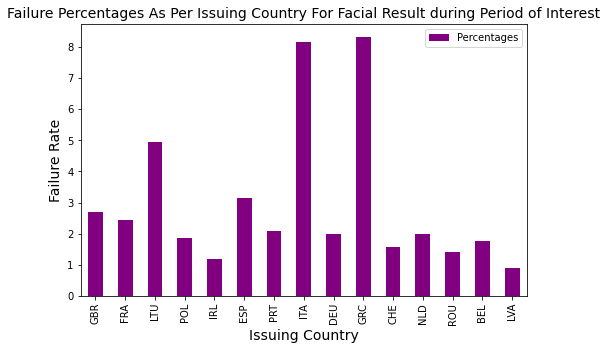

In [ ]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['result_facial'] == 1) & (suspected_data['Passed'] == 1)]['issuing_country'].value_counts()
b=suspected_data['issuing_country'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='purple',figsize=(8,5))
plt.xlabel("Issuing Country",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Issuing Country For Facial Result during Period of Interest",fontsize=14)
plt.show()

Failed Applicants
 GBR    578.0
ESP    260.0
LTU    240.0
FRA    168.0
ITA     82.0
       ...  
<B0      0.0
DN<      0.0
PSE      0.0
SDN      0.0
ARE      0.0
Name: nationality, Length: 182, dtype: float64 

Total Applicants
 GBR    7066
ESP    4355
FRA    3622
POL    2845
IRL    2808
       ... 
<B0       1
DN<       1
PSE       1
SDN       1
ARE       1
Name: nationality, Length: 182, dtype: int64 

Percentages
      Percentages
GBR     8.180017
ESP     5.970149
FRA     4.638321
POL     2.249561
IRL     2.314815
LTU     9.385999
PRT     2.625723
DEU     3.717201
CHE     1.501502
ITA     8.274470
ROU     3.474903
NLD     2.982732
BEL     5.405405
GRC     4.384486
HUN     2.359347


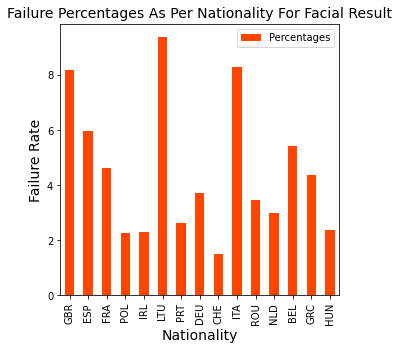

In [45]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['result_facial'] == 1)]['nationality'].value_counts()
b=final_data_2['nationality'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]


print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)
percentages.plot(kind='bar',color='orangered',figsize=(5,5))
plt.xlabel("Nationality",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Nationality For Facial Result",fontsize=14)
plt.show()


Failed Applicants
 driving_licence           1958
national_identity_card    1347
passport                  1184
residence_permit            91
birth_certificate            1
Name: document_type, dtype: int64 

Total Applicants
 driving_licence           25585
national_identity_card    25813
passport                  21940
residence_permit           1451
birth_certificate             1
dtype: int64 

Percentages
 driving_licence             7.652922
national_identity_card      5.218301
passport                    5.396536
residence_permit            6.271537
birth_certificate         100.000000
dtype: float64


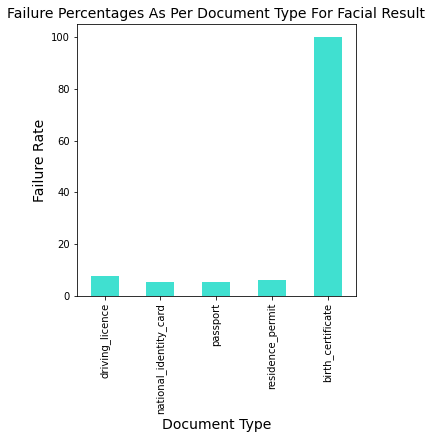

In [46]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['result_facial'] == 1)]['document_type'].value_counts()
b=final_data_2['document_type'].value_counts()
dictionary={}
for item in a.index:
  dictionary[item]=b[item]
b=pd.Series(dictionary)
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='turquoise',figsize=(5,5))
plt.xlabel("Document Type",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Document Type For Facial Result",fontsize=14)
plt.show()

Failed Applicants
 GBR    1657.0
FRA     533.0
LTU     351.0
ESP     344.0
GRC     332.0
        ...  
JAM       0.0
TTO       0.0
AFG       0.0
BRB       0.0
GIN       0.0
Name: issuing_country, Length: 150, dtype: float64 

Total Applicants
 GBR    21444
FRA    11377
ESP     5251
IRL     4619
POL     4254
       ...  
JAM        1
TTO        1
AFG        1
BRB        1
GIN        1
Name: issuing_country, Length: 150, dtype: int64 

Percentages
      Percentages
GBR     7.727103
FRA     4.684891
ESP     6.551133
IRL     4.070145
POL     3.455571
LTU     8.260767
PRT     4.751620
ITA    11.384919
GRC    16.683417
DEU     4.248540
CHE     2.382445
NLD     3.235515
ROU     3.648069
BEL     5.367561
HUN     2.200825


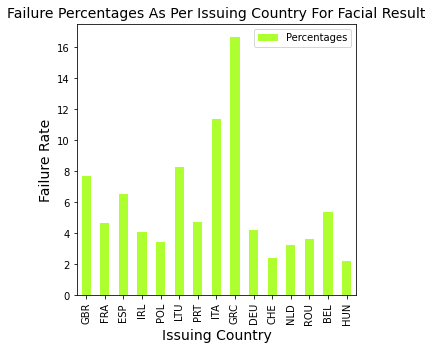

In [47]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['result_facial'] == 1)]['issuing_country'].value_counts()
b=final_data_2['issuing_country'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='greenyellow',figsize=(5,5))
plt.xlabel("Issuing Country",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Issuing Country For Facial Result",fontsize=14)
plt.show()

Failed Applicants
 Male      2245
Female    1115
NaN         26
Name: gender, dtype: int64 

Total Applicants
 Male      39754
Female    20689
NaN         288
8             3
MALE          1
FEMALE        1
Name: gender, dtype: int64 

Percentages
 8         0.000000
FEMALE    0.000000
Female    5.389337
MALE      0.000000
Male      5.647230
NaN       9.027778
Name: gender, dtype: float64


Text(0.5, 1.0, 'Failure Percentages As Per Gender For Facial Result')

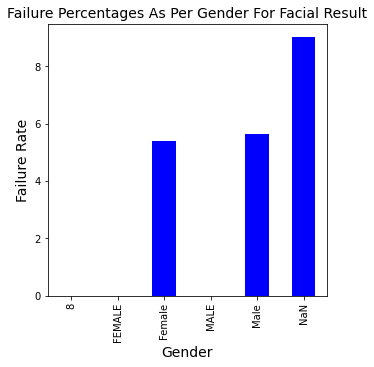

In [48]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['result_facial'] == 1)]['gender'].value_counts()
b=final_data_2['gender'].value_counts()
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='blue',figsize=(5,5))
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Gender For Facial Result",fontsize=14)

# result_docs

Failed Applicants
 Male      8658
Female    4591
NaN        128
Name: gender, dtype: int64 

Total Applicants
 Male      38643
Female    20847
NaN         342
dtype: int64 

Percentages
 Male      22.405093
Female    22.022353
NaN       37.426901
dtype: float64


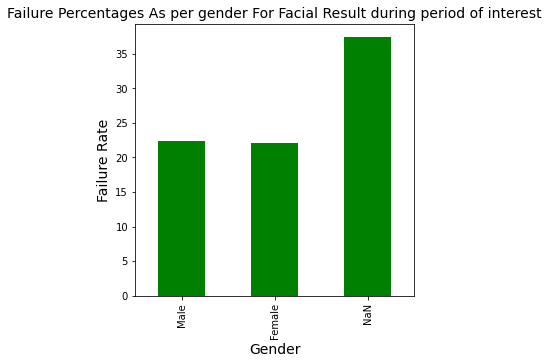

In [ ]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['result_docs'] == 1) & (suspected_data['Passed'] == 1)]['gender'].value_counts()
b=suspected_data['gender'].value_counts()
dictionary={}
for item in a.index:
  dictionary[item]=b[item]
b=pd.Series(dictionary)
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='green',figsize=(5,5))
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As per gender For Docs Result during period of interest",fontsize=14)
plt.show()

Failed Applicants
 national_identity_card    1020.0
driving_licence            784.0
passport                   371.0
residence_permit            52.0
work_permit                  0.0
voter_id                     0.0
tax_id                       0.0
Name: document_type, dtype: float64 

Total Applicants
 national_identity_card    28800
driving_licence           24907
passport                  20288
residence_permit           1478
work_permit                  10
voter_id                      5
tax_id                        4
Name: document_type, dtype: int64 

Percentages
                         Percentages
national_identity_card     3.541667
driving_licence            3.147709
passport                   1.828667
residence_permit           3.518268
work_permit                0.000000
voter_id                   0.000000
tax_id                     0.000000


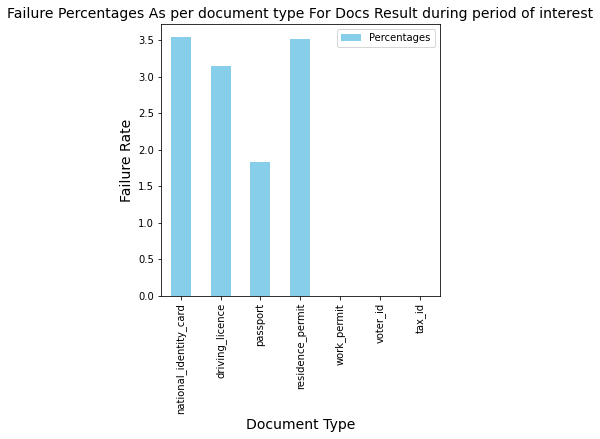

In [ ]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['result_facial'] == 1) & (suspected_data['Passed'] == 1)]['document_type'].value_counts()
b=suspected_data['document_type'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='skyblue',figsize=(5,5))
plt.xlabel("Document Type",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As per document type For Docs Result during period of interest",fontsize=14)
plt.show()

Failed Applicants
 GBR    1890.0
FRA     969.0
IRL     962.0
LTU     888.0
ESP     588.0
        ...  
MWI       0.0
CAF       0.0
G8R       0.0
1GT       0.0
BWA       0.0
Name: nationality, Length: 172, dtype: float64 

Total Applicants
 GBR    5586
LTU    5012
ESP    3408
POL    3298
IRL    3279
       ... 
CAF       1
G8R       1
SYC       1
1GT       1
BWA       1
Name: nationality, Length: 172, dtype: int64 

Percentages
      Percentages
GBR    33.834586
LTU    17.717478
ESP    17.253521
POL    15.615525
IRL    29.338213
FRA    31.594392
PRT    20.009054
DEU    19.774011
ITA    23.411662
ROU    16.077537
CHE    11.778563
NLD    27.586207
BEL    18.604651
HUN    16.538462
LVA    26.356589


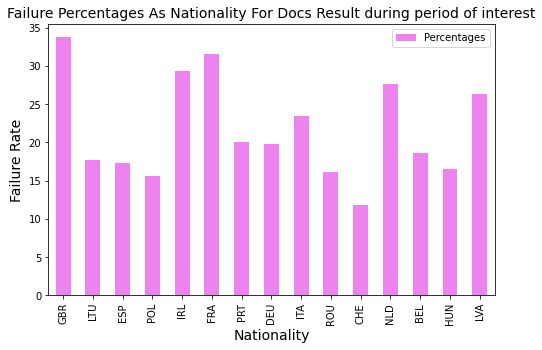

In [ ]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['result_docs'] == 1) & (suspected_data['Passed'] == 1)]['nationality'].value_counts()
b=suspected_data['nationality'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='violet',figsize=(8,5))
plt.xlabel("Nationality",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Nationality For Docs Result during period of interest",fontsize=14)
plt.show()

Failed Applicants
 GBR    5403.0
FRA    2077.0
LTU    1298.0
IRL    1196.0
ESP     723.0
        ...  
GIN       0.0
CAF       0.0
QAT       0.0
MRT       0.0
BWA       0.0
Name: issuing_country, Length: 144, dtype: float64 

Total Applicants
 GBR    18237
FRA    12145
LTU     8726
POL     4856
IRL     4613
       ...  
CAF        1
QAT        1
TGO        1
MRT        1
BWA        1
Name: issuing_country, Length: 144, dtype: int64 

Percentages
      Percentages
GBR    29.626583
FRA    17.101688
LTU    14.875086
POL    13.962109
IRL    25.926729
ESP    17.161168
PRT    18.969298
ITA    21.216563
DEU    18.323353
GRC    12.306559
CHE     9.859155
NLD    19.981998
ROU    15.370197
BEL    19.189189
LVA    23.008850


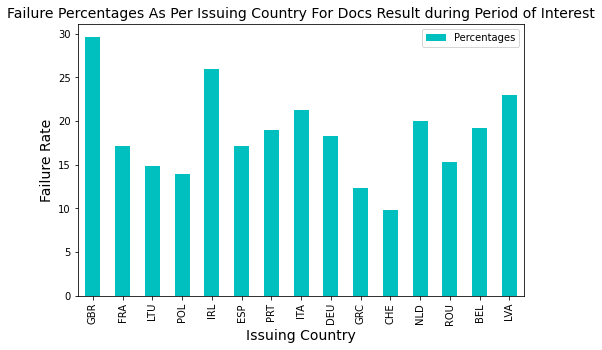

In [ ]:
suspected_data=final_data_1[(final_data_1['created_at_facial']>='2017-09-01') &(final_data_1['created_at_facial']<='2017-10-31')] 
a=suspected_data[(suspected_data['result_docs'] == 1) & (suspected_data['Passed'] == 1)]['issuing_country'].value_counts()
b=suspected_data['issuing_country'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='c',figsize=(8,5))
plt.xlabel("Issuing Country",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Issuing Country For Docs Result during Period of Interest",fontsize=14)
plt.show()

Failed Applicants
 GBR    256.0
FRA    184.0
IRL    107.0
ESP    103.0
PRT     89.0
       ...  
BDI      0.0
DN<      0.0
PSE      0.0
SDN      0.0
ARE      0.0
Name: nationality, Length: 182, dtype: float64 

Total Applicants
 GBR    7066
ESP    4355
FRA    3622
POL    2845
IRL    2808
       ... 
<B0       1
DN<       1
PSE       1
SDN       1
ARE       1
Name: nationality, Length: 182, dtype: int64 

Percentages
      Percentages
GBR     3.622983
ESP     2.365098
FRA     5.080066
POL     2.460457
IRL     3.810541
LTU     2.542041
PRT     3.960837
DEU     3.862974
CHE     2.902903
ITA     4.641776
ROU     5.405405
NLD     4.866562
BEL     7.472178
GRC     8.768971
HUN     2.359347


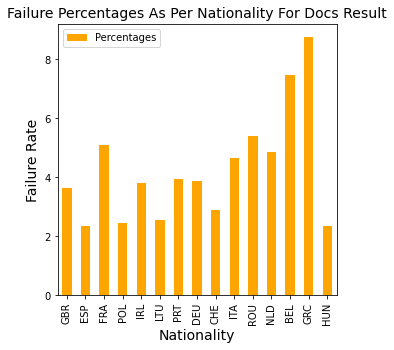

In [49]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['result_docs'] == 1)]['nationality'].value_counts()
b=final_data_2['nationality'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]


print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)
percentages.plot(kind='bar',color='orange',figsize=(5,5))
plt.xlabel("Nationality",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Nationality For Docs Result",fontsize=14)
plt.show()

Failed Applicants
 passport                  1022
national_identity_card     774
driving_licence            727
residence_permit            82
Name: document_type, dtype: int64 

Total Applicants
 passport                  21940
national_identity_card    25813
driving_licence           25585
residence_permit           1451
dtype: int64 

Percentages
 passport                  4.658159
national_identity_card    2.998489
driving_licence           2.841509
residence_permit          5.651275
dtype: float64


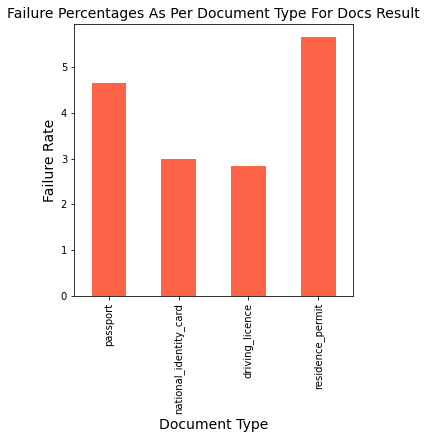

In [50]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['result_docs'] == 1)]['document_type'].value_counts()
b=final_data_2['document_type'].value_counts()
dictionary={}
for item in a.index:
  dictionary[item]=b[item]
b=pd.Series(dictionary)
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='tomato',figsize=(5,5))
plt.xlabel("Document Type",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Document Type For Docs Result",fontsize=14)
plt.show()

Failed Applicants
 GBR    631.0
FRA    447.0
IRL    166.0
ITA    142.0
ESP    135.0
       ...  
JAM      0.0
TTO      0.0
AFG      0.0
BRB      0.0
GIN      0.0
Name: issuing_country, Length: 150, dtype: float64 

Total Applicants
 GBR    21444
FRA    11377
ESP     5251
IRL     4619
POL     4254
       ...  
JAM        1
TTO        1
AFG        1
BRB        1
GIN        1
Name: issuing_country, Length: 150, dtype: int64 

Percentages
      Percentages
GBR     2.942548
FRA     3.928980
ESP     2.570939
IRL     3.593851
POL     2.468265
LTU     2.118145
PRT     4.139669
ITA     6.998521
GRC     4.874372
DEU     3.876792
CHE     2.194357
NLD     3.386005
ROU     5.257511
BEL     8.751459
HUN     2.063274


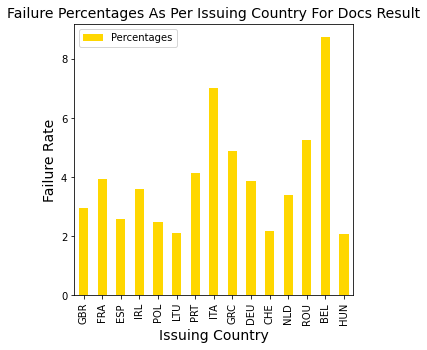

In [51]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['result_docs'] == 1)]['issuing_country'].value_counts()
b=final_data_2['issuing_country'].value_counts()
percentages=pd.DataFrame(index=b.index)
for item in percentages.index:
  if(item not in a.index):
    a[item]=0.0
percentages['Percentages']=a/b*100
percentages=percentages[:15]
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='gold',figsize=(5,5))
plt.xlabel("Issuing Country",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Issuing Country For Docs Result",fontsize=14)
plt.show()

Failed Applicants
 Male      1525
Female     609
NaN         29
8            2
Name: gender, dtype: int64 

Total Applicants
 Male      39754
Female    20689
NaN         288
8             3
MALE          1
FEMALE        1
Name: gender, dtype: int64 

Percentages
 8         66.666667
FEMALE     0.000000
Female     2.943593
MALE       0.000000
Male       3.836092
NaN       10.069444
Name: gender, dtype: float64


Text(0.5, 1.0, 'Failure Percentages As Per Gender For Docs Result')

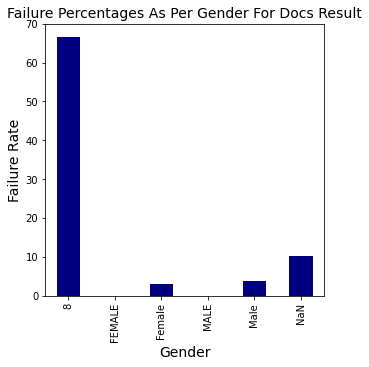

In [52]:
final_data_2=final_data_1[(final_data_1['created_at_facial']<'2017-09-01') | (final_data_1['created_at_facial']>'2017-10-31')] 
a=final_data_2[(final_data_2['Passed'] == 1) & (final_data_2['result_docs'] == 1)]['gender'].value_counts()
b=final_data_2['gender'].value_counts()
percentages=a/b*100
percentages.fillna(0,inplace=True)
print("Failed Applicants\n",a,"\n")
print("Total Applicants\n",b,"\n")
print("Percentages\n",percentages)

percentages.plot(kind='bar',color='navy',figsize=(5,5))
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Failure Rate",fontsize=14)
plt.title("Failure Percentages As Per Gender For Docs Result",fontsize=14)